In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv(r'C:\Users\satti\Downloads\agriculture_data.csv')


In [3]:
data

Domain Code                        Domain  Area Code (M49)         Area  \
0             QCL  Crops and livestock products                4  Afghanistan   
1             QCL  Crops and livestock products                4  Afghanistan   
2             QCL  Crops and livestock products                4  Afghanistan   
3             QCL  Crops and livestock products                4  Afghanistan   
4             QCL  Crops and livestock products                4  Afghanistan   
...           ...                           ...              ...          ...   
58601         QCL  Crops and livestock products              887        Yemen   
58602         QCL  Crops and livestock products              887        Yemen   
58603         QCL  Crops and livestock products              887        Yemen   
58604         QCL  Crops and livestock products              887        Yemen   
58605         QCL  Crops and livestock products              887        Yemen   

       Element Code         Element Item Code (CPC)               Item  \
0              5312  Area harvested           01371  Almonds, in shell   
1              5419           Yield           01371  Almonds, in shell   
2              5510      Production           01371  Almonds, in shell   
3              5312  Area harvested           01371  Almonds, in shell   
4              5419           Yield           01371  Almonds, in shell   
...             ...             ...             ...                ...   
58601          5419           Yield            0111              Wheat   
58602          5510      Production            0111              Wheat   
58603          5312  Area harvested            0111              Wheat   
58604          5419           Yield            0111              Wheat   
58605          5510      Production            0111              Wheat   

       Year Code  Year      Unit      Value Flag  \
0           2016  2016        ha   19481.00    A   
1           2016  2016  100 g/ha   16859.00    A   
2           2016  2016         t   32843.00    A   
3           2017  2017        ha   19793.00    A   
4           2017  2017  100 g/ha   13788.00    A   
...          ...   ...       ...        ...  ...   
58601       2021  2021  100 g/ha   22644.00    A   
58602       2021  2021         t  138026.99    A   
58603       2022  2022        ha   60000.00    X   
58604       2022  2022  100 g/ha   16667.00    X   
58605       2022  2022         t  100000.00    X   

                              Flag Description               Note  
0                              Official figure                NaN  
1                              Official figure                NaN  
2                              Official figure                NaN  
3                              Official figure                NaN  
4                              Official figure                NaN  
...                                        ...                ...  
58601                          Official figure                NaN  
58602                          Official figure                NaN  
58603  Figure from international organizations  Unofficial figure  
58604  Figure from international organizations                NaN  
58605  Figure from international organizations  Unofficial figure  

[58606 rows x 15 columns]

In [4]:
# Domain Code Represents a code identifying the domain of the data, such as a specific sector, category.
# Domain : A descriptive name for the domain associated with the Domain Code.
# Area Code (M49) An identifier for geographic areas, likely based on the M49 standard (used by the United Nations).
# Area The name of the geographic area corresponding to the Area Code (M49).
# Element Code A numeric code representing specific data elements
# Element A descriptive label for the data element associated with the Element Code.
# Item Code (CPC) A code identifying specific items or products.
# Item The name of the product or item
# Year Code A code for the year the data pertains to
# Year The calendar year of the data.
# Unit The unit of measurement for the data in the Value column.
# Value The numeric value or observation corresponding to the specified domain, area, element, item, and year.
# Flag A code indicating the quality, status, or source of the data.
# Flag Description A descriptive explanation of the Flag.
# Note Additional comments or explanations for certain rows

In [5]:
data.isnull().sum()

Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                57017
dtype: int64


In [6]:
data.Note.value_counts()

Note
Unofficial figure    1589
Name: count, dtype: int64

In [9]:
data.Element.value_counts()

Element
Production        21979
Area harvested    19028
Yield             17599
Name: count, dtype: int64

In [298]:
for col in data.columns:
    zero_count = (data[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' has {zero_count} zero values.")

Column 'Value' has 3053 zero values.


In [10]:
filtered_data = data[(data['Value'] == 0) & 
                     (data['Element'].isin(['Area harvested', 'Yield', 'Production']))]

filtered_data

Domain Code                        Domain  Area Code (M49)     Area  \
831           QCL  Crops and livestock products               51  Armenia   
832           QCL  Crops and livestock products               51  Armenia   
833           QCL  Crops and livestock products               51  Armenia   
834           QCL  Crops and livestock products               51  Armenia   
835           QCL  Crops and livestock products               51  Armenia   
...           ...                           ...              ...      ...   
58559         QCL  Crops and livestock products              887    Yemen   
58560         QCL  Crops and livestock products              887    Yemen   
58561         QCL  Crops and livestock products              887    Yemen   
58562         QCL  Crops and livestock products              887    Yemen   
58563         QCL  Crops and livestock products              887    Yemen   

       Element Code         Element Item Code (CPC)               Item  \
831            5312  Area harvested           01371  Almonds, in shell   
832            5510      Production           01371  Almonds, in shell   
833            5312  Area harvested           01371  Almonds, in shell   
834            5510      Production           01371  Almonds, in shell   
835            5312  Area harvested           01371  Almonds, in shell   
...             ...             ...             ...                ...   
58559          5510      Production           01376  Walnuts, in shell   
58560          5312  Area harvested           01376  Walnuts, in shell   
58561          5510      Production           01376  Walnuts, in shell   
58562          5312  Area harvested           01376  Walnuts, in shell   
58563          5510      Production           01376  Walnuts, in shell   

       Year Code  Year Unit  Value Flag  \
831         2016  2016   ha    0.0    M   
832         2016  2016    t    0.0    M   
833         2017  2017   ha    0.0    M   
834         2017  2017    t    0.0    M   
835         2018  2018   ha    0.0    M   
...          ...   ...  ...    ...  ...   
58559       2020  2020    t    0.0    I   
58560       2021  2021   ha    0.0    I   
58561       2021  2021    t    0.0    I   
58562       2022  2022   ha    0.0    I   
58563       2022  2022    t    0.0    I   

                                        Flag Description Note  
831    Missing value (data cannot exist, not applicable)  NaN  
832    Missing value (data cannot exist, not applicable)  NaN  
833    Missing value (data cannot exist, not applicable)  NaN  
834    Missing value (data cannot exist, not applicable)  NaN  
835    Missing value (data cannot exist, not applicable)  NaN  
...                                                  ...  ...  
58559                                      Imputed value  NaN  
58560                                      Imputed value  NaN  
58561                                      Imputed value  NaN  
58562                                      Imputed value  NaN  
58563                                      Imputed value  NaN  

[3053 rows x 15 columns]

In [11]:
filtered_data.Element.value_counts()

Element
Production        1584
Area harvested    1469
Name: count, dtype: int64

In [13]:
data.pivot_table(index=['Area', 'Item', 'Year'], columns='Element', values='Value', aggfunc='first').reset_index()
#If there are duplicate entries for the same combination of Area, Item, Year, and Element,
#this function picks the first occurrence.

Element         Area               Item  Year  Area harvested  Production  \
0        Afghanistan  Almonds, in shell  2016         19481.0    32843.00   
1        Afghanistan  Almonds, in shell  2017         19793.0    27291.00   
2        Afghanistan  Almonds, in shell  2018         20053.0    34413.00   
3        Afghanistan  Almonds, in shell  2019         29203.0    38205.00   
4        Afghanistan  Almonds, in shell  2020         22134.0    39307.00   
...              ...                ...   ...             ...         ...   
21974          Yemen              Wheat  2018         64339.0    92210.00   
21975          Yemen              Wheat  2019         57466.0   100332.00   
21976          Yemen              Wheat  2020         59190.0   127171.00   
21977          Yemen              Wheat  2021         60955.0   138026.99   
21978          Yemen              Wheat  2022         60000.0   100000.00   

Element    Yield  
0        16859.0  
1        13788.0  
2        17161.0  
3        13083.0  
4        17759.0  
...          ...  
21974    14332.0  
21975    17459.0  
21976    21485.0  
21977    22644.0  
21978    16667.0  

[21979 rows x 6 columns]

In [14]:
data.drop(columns=['Year Code', 'Domain Code', 'Note'], inplace=True)

In [15]:
almond_data = data[data['Item'] == 'Almonds, in shell']
pivot_data = almond_data.pivot_table(index=['Year'], columns='Element', values='Value', aggfunc='sum')
pivot_data['Yield per Hectare'] = pivot_data['Production'] / pivot_data['Area harvested']


In [16]:
pivot_data['Area Difference'] = pivot_data['Area harvested'].diff()


In [17]:
pivot_data['Production Difference'] = pivot_data['Production'].diff()


In [18]:
pivot_data['Yield Change (%)'] = (pivot_data['Yield per Hectare'].pct_change() * 100)
pivot_data

Element  Area harvested  Production      Yield  Yield per Hectare  \
Year                                                                
2016           237337.0   429956.91   861399.0           1.811588   
2017           226986.0   478242.89   925758.0           2.106927   
2018           285067.0   625694.83   924755.0           2.194904   
2019           291313.0   647344.15   895765.0           2.222160   
2020           287860.0   667413.86   915060.0           2.318536   
2021           302774.0   627300.28   968258.0           2.071843   
2022           312393.0   601267.17  1034838.0           1.924714   

Element  Area Difference  Production Difference  Yield Change (%)  
Year                                                               
2016                 NaN                    NaN               NaN  
2017            -10351.0               48285.98         16.302745  
2018             58081.0              147451.94          4.175638  
2019              6246.0               21649.32          1.241773  
2020             -3453.0               20069.71          4.337046  
2021             14914.0              -40113.58        -10.640032  
2022              9619.0              -26033.11         -7.101373

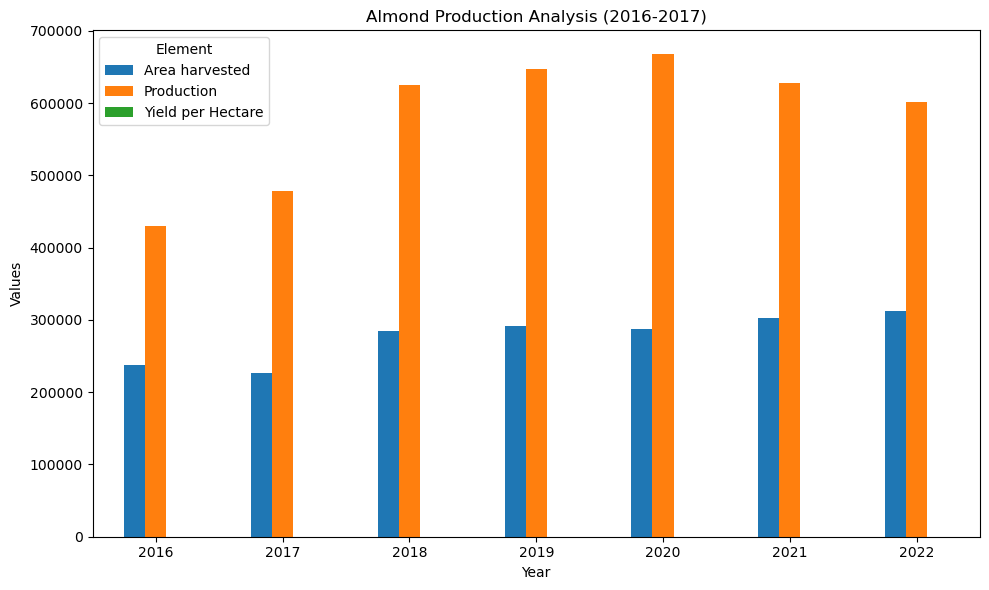

In [20]:
import matplotlib.pyplot as plt

pivot_data[['Area harvested', 'Production', 'Yield per Hectare']].plot(kind='bar', figsize=(10,6))
plt.title('Almond Production Analysis (2016-2017)')
plt.ylabel('Values')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in data.columns: #Iterates through each column in the DataFrame.
    #if data[column].dtype==object and 
    if len(data[column].unique()) <= 15:#Checks if the column's data type is 'object' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_clist.
        print(f"{column} : {data[column].unique()}") #Prints the name of the column and its unique values.
        print("====================================") # Prints a separator line for clarity.


Domain : ['Crops and livestock products']
Element Code : [5312 5419 5510]
Element : ['Area harvested' 'Yield' 'Production']
Year : [2016 2017 2018 2019 2020 2021 2022]
Unit : ['ha' '100 g/ha' 't']
Flag : ['A' 'E' 'I' 'X' 'M']
Flag Description : ['Official figure' 'Estimated value' 'Imputed value'
 'Figure from international organizations'
 'Missing value (data cannot exist, not applicable)']


In [19]:
categorical_col

['Domain',
 'Element Code',
 'Element',
 'Year',
 'Unit',
 'Flag',
 'Flag Description']

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

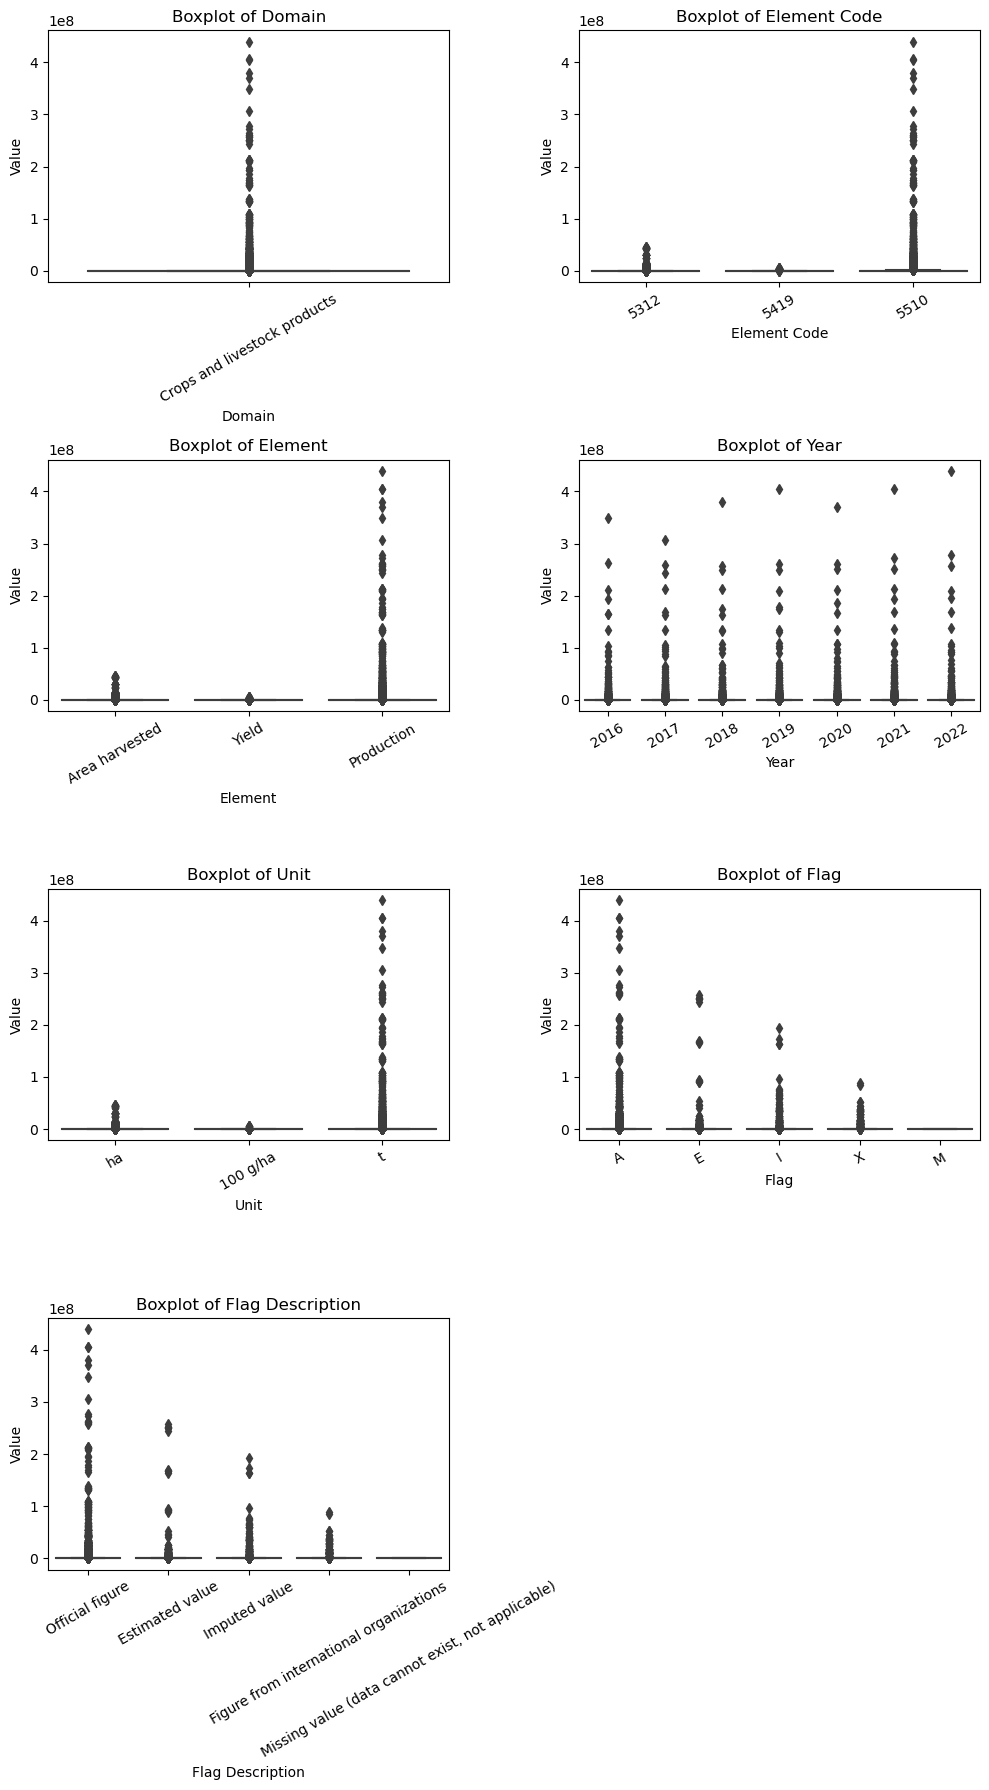

In [21]:
plt.figure(figsize=[10,18])

features = ['Domain', 'Element Code', 'Element', 'Year', 'Unit', 'Flag', 'Flag Description']

n=1
for f in features: 
    plt.subplot(4,2,n) 
        
    sns.boxplot(x=f,y= 'Value', data=data)
    
    plt.title('Boxplot of {}'.format(f))

    
    n= n+1 
    plt.xticks(rotation=30)

plt.tight_layout() # Ensures that the plots are properly arranged within the figure without any overlapping. 

plt.show()

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


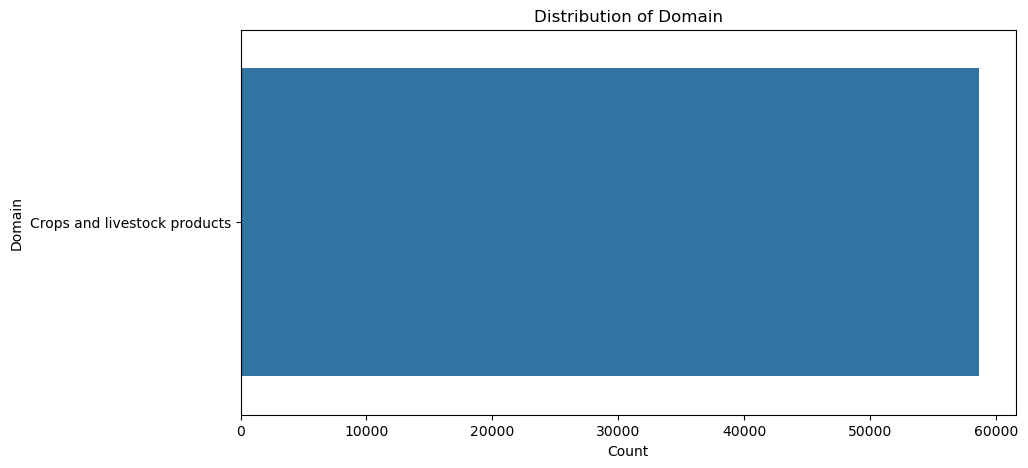

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


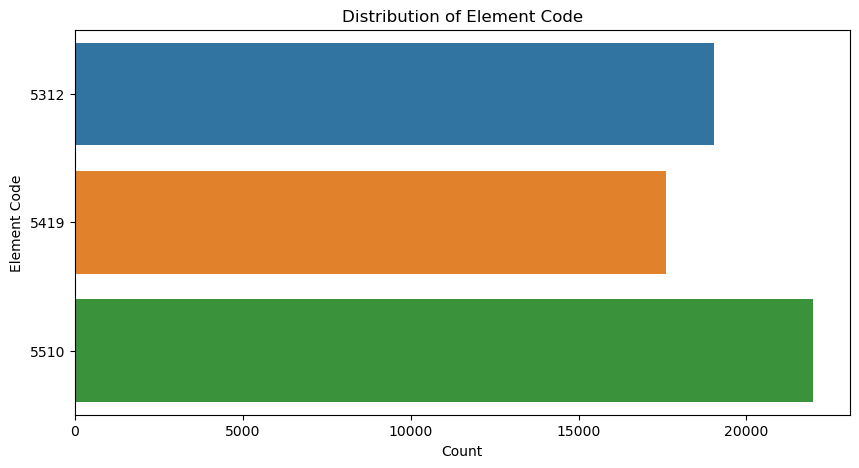

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


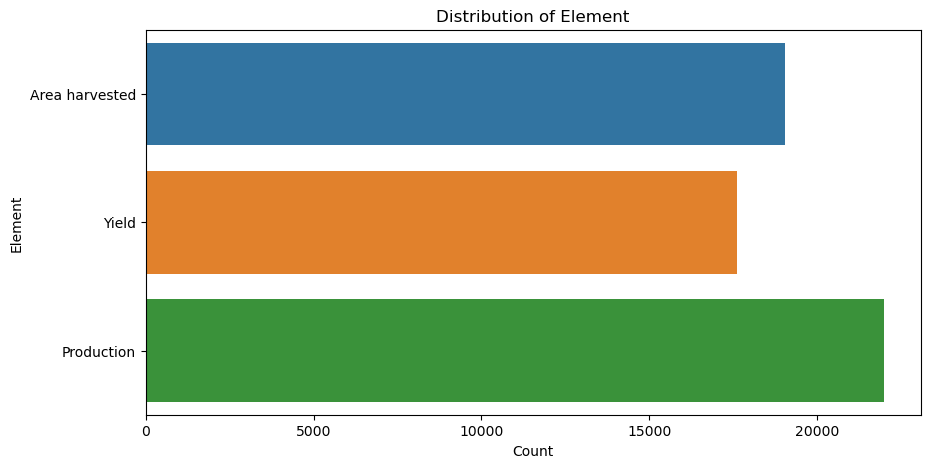

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


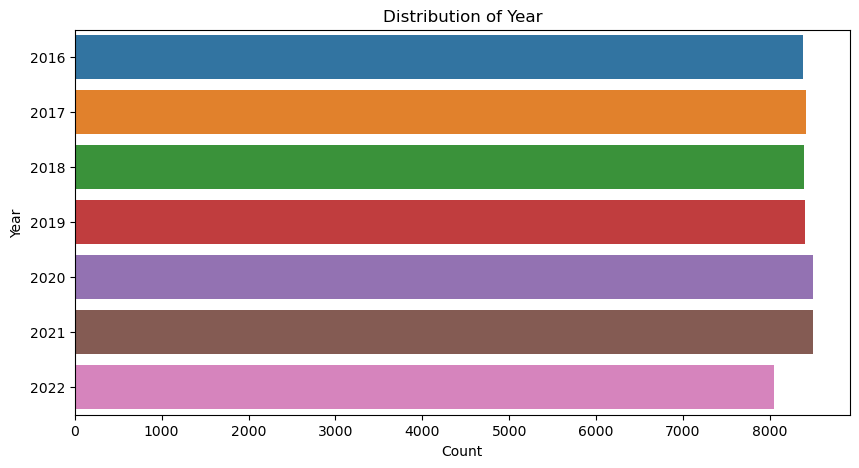

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


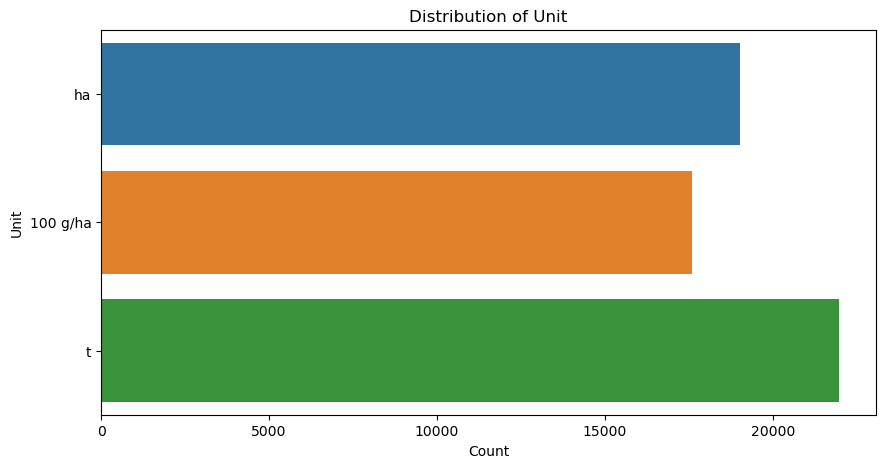

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


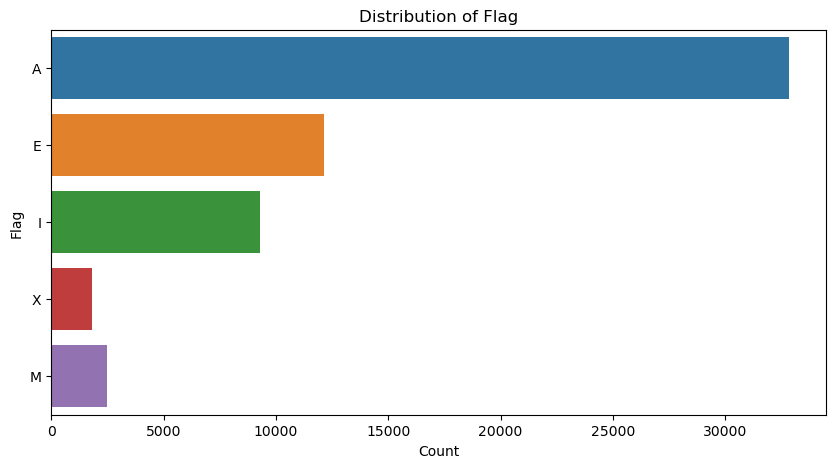

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


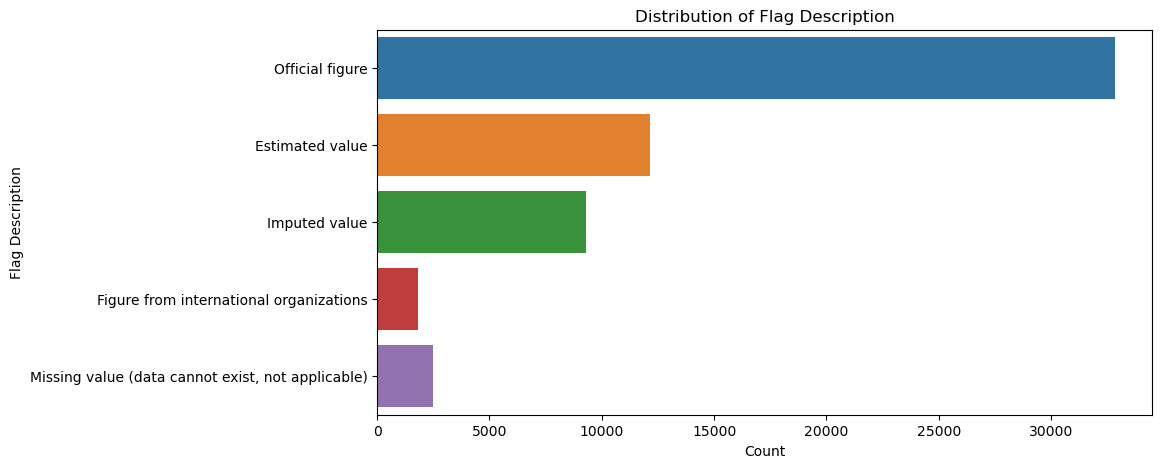

In [22]:
# List of categorical columns
categorical_cols = ['Domain', 'Element Code', 'Element', 'Year', 'Unit', 'Flag', 'Flag Description']

# Plotting countplot for each specified categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [31]:
# Continuous column
continuous_col = []
for column in data.columns:
    if len(data[column].unique()) > 15:
        continuous_col.append(column)
        print(f"{column} : {data[column].describe()}")
        print(f"{column} : {data[column].unique()}")
        print("====================================")

Area Code (M49) : count    58606.000000
mean       417.389329
std        247.220459
min          4.000000
25%        196.000000
50%        398.000000
75%        608.000000
max        887.000000
Name: Area Code (M49), dtype: float64
Area Code (M49) : [  4  51  31  48  50  64  96 116 344 446 156 158 196 408 268 356 360 364
 368 376 392 400 398 414 417 418 422 458 462 496 104 524 512 586 275 608
 634 410 682 702 144 760 762 764 626 792 795 784 860 704 887]
Area : count               58606
unique                 51
top       China, mainland
freq                 2600
Name: Area, dtype: object
Area : ['Afghanistan' 'Armenia' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Bhutan'
 'Brunei Darussalam' 'Cambodia' 'China, Hong Kong SAR' 'China, Macao SAR'
 'China, mainland' 'China, Taiwan Province of' 'Cyprus'
 "Democratic People's Republic of Korea" 'Georgia' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Israel' 'Japan' 'Jordan'
 'Kazakhstan' 'Kuwait' 'Kyrgyzstan' "Lao People's Democratic Rep

In [26]:
continuous_col

['Area Code (M49)', 'Area', 'Item Code (CPC)', 'Item', 'Value']

In [22]:
import plotly.express as px

top_items = data.groupby('Item')['Value'].sum().nlargest(3).index
filtered_data = data[data['Item'].isin(top_items)]

# Sunburst chart for hierarchical data
fig = px.sunburst(filtered_data, path=['Area', 'Element', 'Item'], values='Value', title='Sunburst Chart of Top 3 Agricultural Items')
fig.show()

In [23]:
fig = px.treemap(filtered_data, path=['Area', 'Element', 'Item'], values='Value', title='Treemap of Top 10 Agricultural Items by Production Volume')
fig.show()

In [24]:
#Line Chart for Trends in Crop Yields for Top 10 Items
top_items = data.groupby('Item')['Value'].sum().nlargest(10).index
filtered_data = data[data['Item'].isin(top_items)]
yield_trends = filtered_data.groupby(['Year', 'Item'])['Value'].mean().unstack()
yield_trends

Item  Cassava, fresh  Cucumbers and gherkins  Maize (corn)  Oil palm fruit  \
Year                                                                         
2016    1.862653e+06           698140.803750  3.325633e+06    1.721936e+07   
2017    1.800510e+06           723152.730859  3.362762e+06    2.124076e+07   
2018    1.727139e+06           762463.001250  3.383984e+06    2.146422e+07   
2019    1.771911e+06           792100.738750  3.319474e+06    2.160676e+07   
2020    1.772130e+06           807704.762656  3.318262e+06    2.155660e+07   
2021    1.973401e+06           822787.749297  3.465350e+06    2.129763e+07   
2022    1.940094e+06           843137.484688  3.600624e+06    2.178573e+07   

Item  Other vegetables, fresh n.e.c.      Potatoes          Rice  \
Year                                                               
2016                    1.809577e+06  1.463030e+06  7.882180e+06   
2017                    1.807552e+06  1.527886e+06  7.918424e+06   
2018                    1.830590e+06  1.565846e+06  7.892696e+06   
2019                    1.918140e+06  1.560485e+06  7.800217e+06   
2020                    1.870216e+06  1.573095e+06  7.965125e+06   
2021                    1.882735e+06  1.646898e+06  8.131524e+06   
2022                    1.898906e+06  1.691982e+06  8.025553e+06   

Item    Sugar cane      Tomatoes         Wheat  
Year                                            
2016  1.044175e+07  9.763151e+05  3.909157e+06  
2017  1.005048e+07  1.003321e+06  3.958678e+06  
2018  1.166537e+07  1.007989e+06  3.852868e+06  
2019  1.185929e+07  9.969702e+05  3.958888e+06  
2020  1.059792e+07  1.027929e+06  4.048979e+06  
2021  1.111364e+07  1.057292e+06  4.015180e+06  
2022  1.186827e+07  1.062446e+06  4.011915e+06

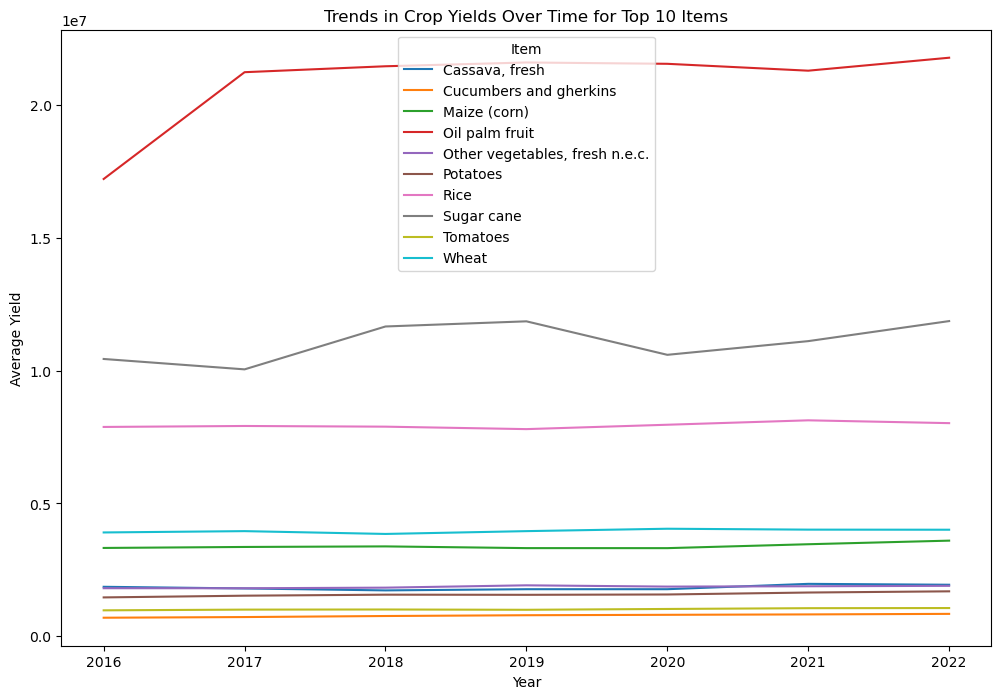

In [312]:
yield_trends.plot(figsize=(12, 8))
plt.title('Trends in Crop Yields Over Time for Top 10 Items')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.legend(title='Item')
plt.show()


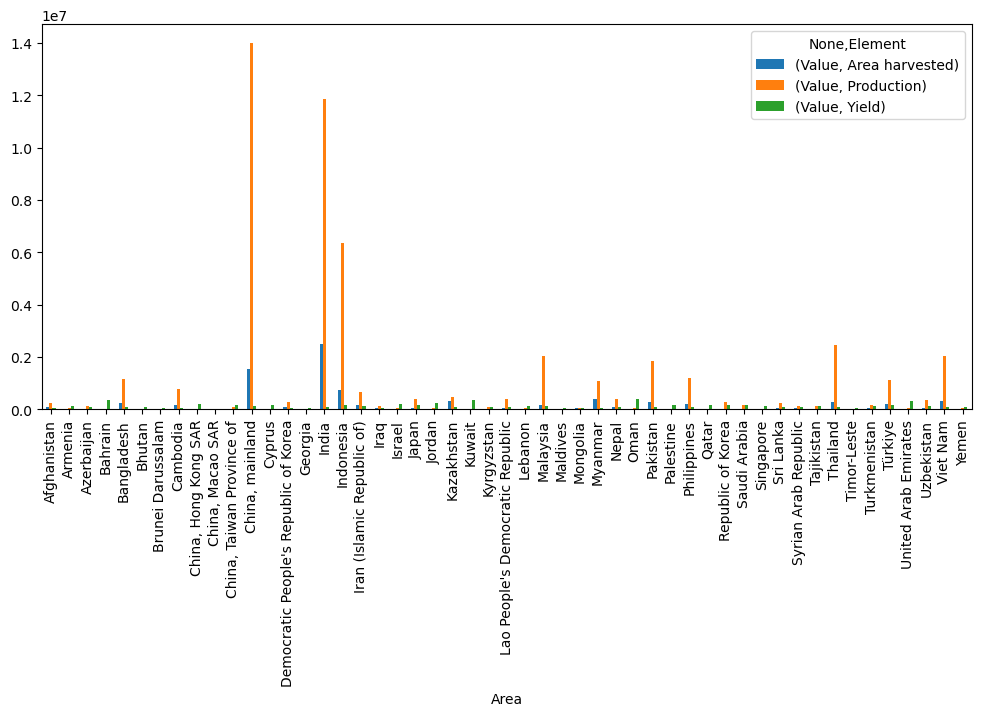

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
pivot_type3 = data.pivot_table(index= ['Area'], columns=['Element'], values=['Value'], aggfunc='mean')
pivot_type3.plot(kind = 'bar', ax = ax)
plt.show()

In [25]:
fig = px.bar(filtered_data, x='Area', y='Value', color='Item', 
             title='Total Production Volume by Area for Top 10 Items', 
             labels={'Value': 'Production Volume', 'Area': 'Country'})
fig.show()

In [26]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

In [27]:
trend_data = filtered_data.groupby(['Year', 'Item', 'Element'])['Value'].sum().reset_index()
fig = px.area(trend_data, x='Year', y='Value', color='Element', 
              line_group='Item', title='Trends in Agricultural Elements Over Time for Top 10 Items')
fig.show()

In [28]:
filtered_data.groupby(['Year', 'Element'])['Value'].sum().reset_index()

Year         Element         Value
0   2016  Area harvested  3.701342e+08
1   2016      Production  3.053831e+09
2   2016           Yield  6.922114e+07
3   2017  Area harvested  3.733369e+08
4   2017      Production  3.125553e+09
5   2017           Yield  7.236118e+07
6   2018  Area harvested  3.709694e+08
7   2018      Production  3.247013e+09
8   2018           Yield  7.475350e+07
9   2019  Area harvested  3.666230e+08
10  2019      Production  3.279182e+09
11  2019           Yield  7.710224e+07
12  2020  Area harvested  3.725286e+08
13  2020      Production  3.223011e+09
14  2020           Yield  7.631168e+07
15  2021  Area harvested  3.776108e+08
16  2021      Production  3.308952e+09
17  2021           Yield  7.794370e+07
18  2022  Area harvested  3.759654e+08
19  2022      Production  3.389070e+09
20  2022           Yield  7.759347e+07

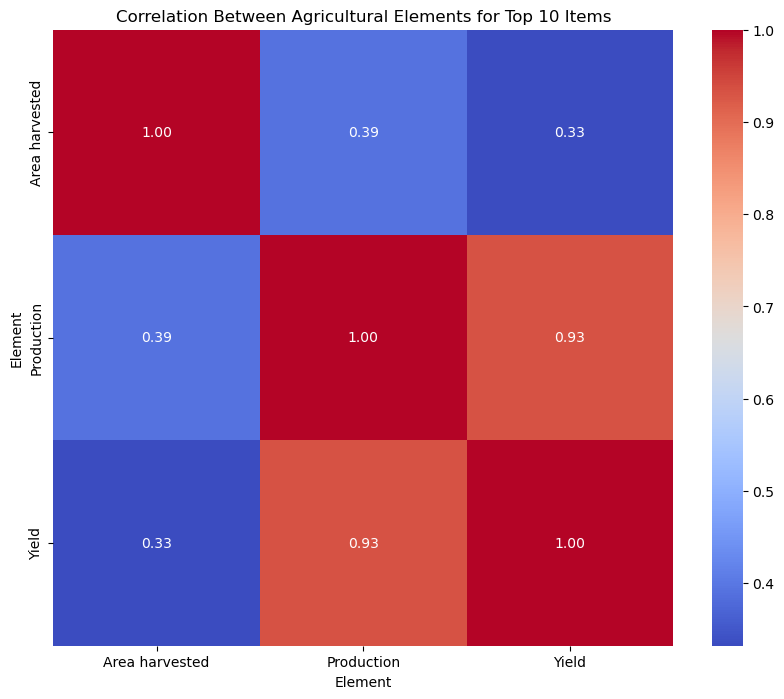

In [316]:
pivot_data = filtered_data.pivot_table(index='Year', columns='Element', values='Value', aggfunc='sum')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Agricultural Elements for Top 10 Items')
plt.show()

In [39]:
pivot_data = data.pivot_table(index='Element', columns=['Year', 'Domain'], values='Value', aggfunc='sum')

In [40]:
pivot_data

Year                                   2016                         2017  \
Domain         Crops and livestock products Crops and livestock products   
Element                                                                    
Area harvested                 6.255294e+08                 6.385368e+08   
Production                     4.704466e+09                 4.833756e+09   
Yield                          2.934292e+08                 3.027266e+08   

Year                                   2018                         2019  \
Domain         Crops and livestock products Crops and livestock products   
Element                                                                    
Area harvested                 6.334730e+08                 6.289199e+08   
Production                     4.989006e+09                 5.058802e+09   
Yield                          3.056864e+08                 3.104743e+08   

Year                                   2020                         2021  \
Domain         Crops and livestock products Crops and livestock products   
Element                                                                    
Area harvested                 6.407385e+08                 6.479815e+08   
Production                     5.001917e+09                 5.107699e+09   
Yield                          3.118155e+08                 3.151724e+08   

Year                                   2022  
Domain         Crops and livestock products  
Element                                      
Area harvested                 6.487889e+08  
Production                     4.877717e+09  
Yield                          3.186462e+08

Text(0.5, 1.0, 'Crop trends over years (By Element)')

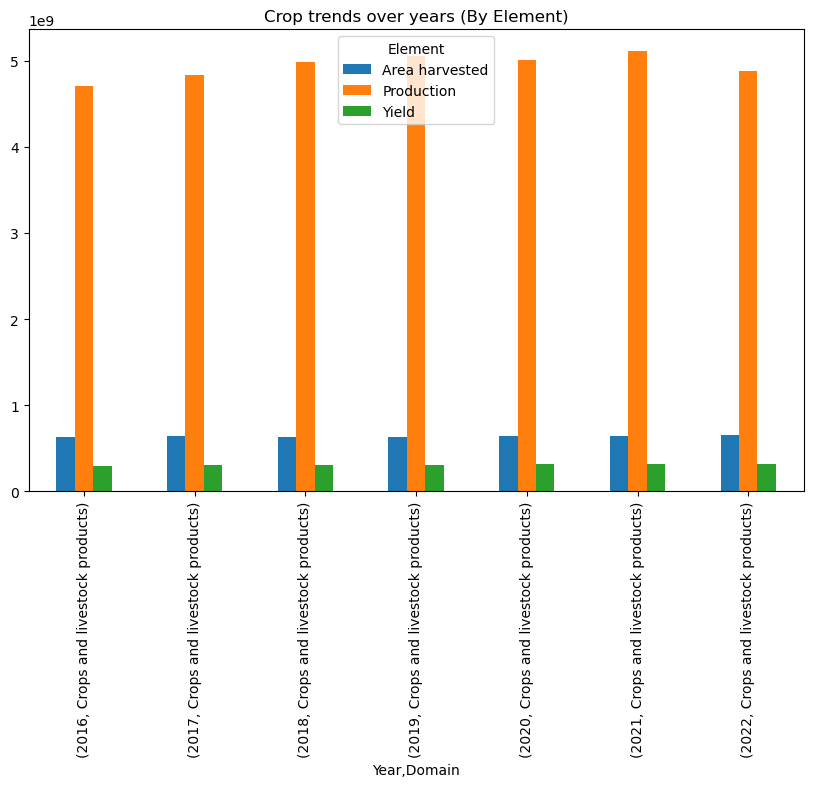

In [41]:
pivot_data.T.plot(kind='bar', figsize=(10, 6)) 
plt.title('Crop trends over years (By Element)')

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



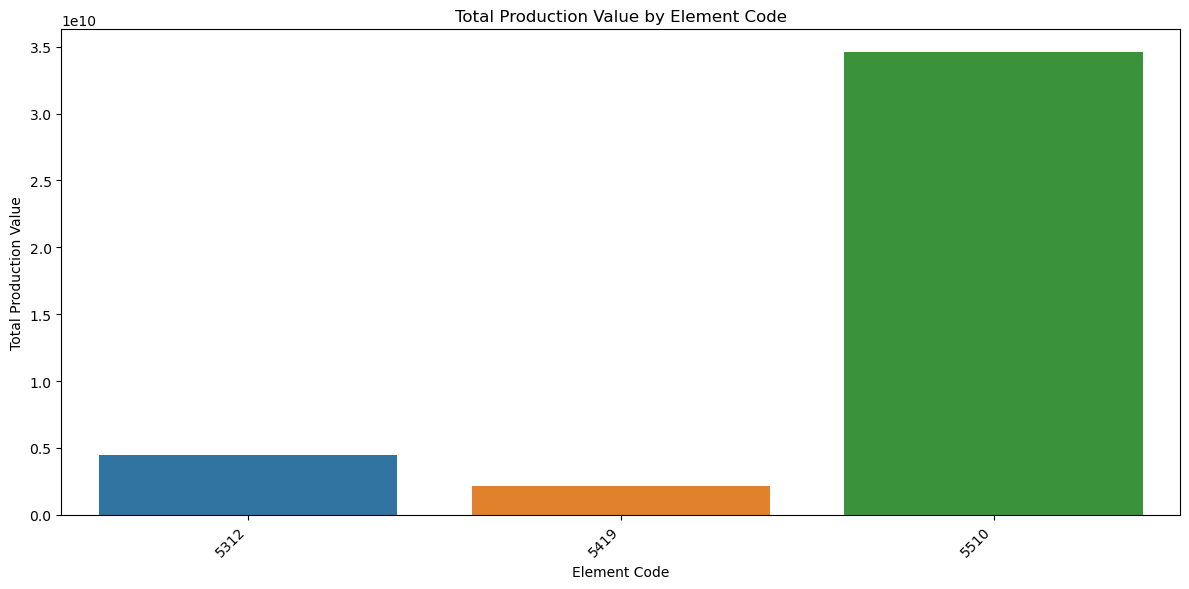

In [43]:
element_production = data.groupby('Element Code')['Value'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=element_production.index, y=element_production.values)
plt.xlabel('Element Code')
plt.ylabel('Total Production Value')
plt.title('Total Production Value by Element Code')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



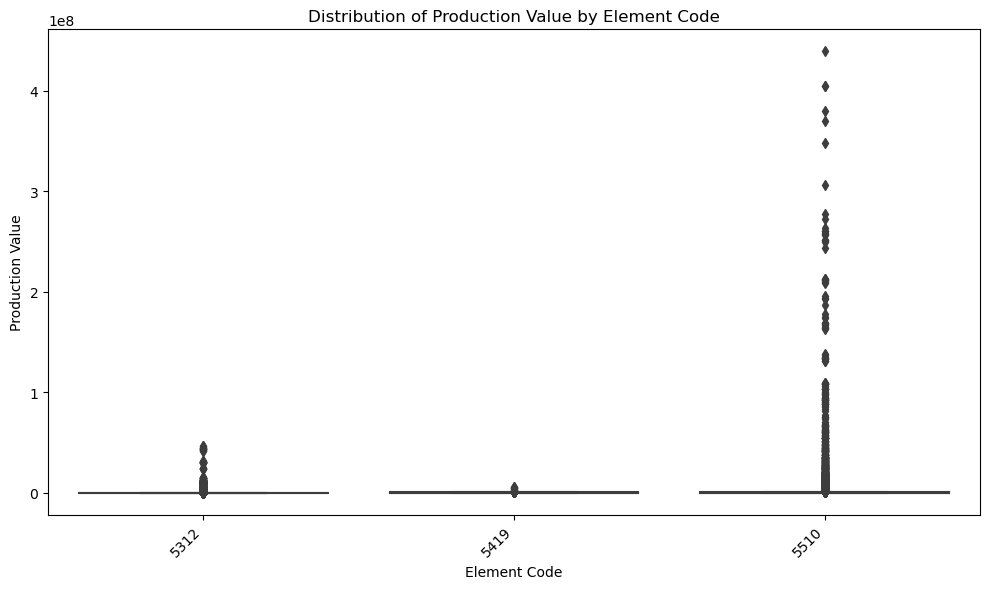

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Element Code', y='Value', data=data)
plt.xlabel('Element Code')
plt.ylabel('Production Value')
plt.title('Distribution of Production Value by Element Code')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
data[data['Element Code']==5510]

Domain  Area Code (M49)         Area  \
2      Crops and livestock products                4  Afghanistan   
5      Crops and livestock products                4  Afghanistan   
8      Crops and livestock products                4  Afghanistan   
11     Crops and livestock products                4  Afghanistan   
14     Crops and livestock products                4  Afghanistan   
...                             ...              ...          ...   
58593  Crops and livestock products              887        Yemen   
58596  Crops and livestock products              887        Yemen   
58599  Crops and livestock products              887        Yemen   
58602  Crops and livestock products              887        Yemen   
58605  Crops and livestock products              887        Yemen   

       Element Code     Element Item Code (CPC)               Item  Year Unit  \
2              5510  Production           01371  Almonds, in shell  2016    t   
5              5510  Production           01371  Almonds, in shell  2017    t   
8              5510  Production           01371  Almonds, in shell  2018    t   
11             5510  Production           01371  Almonds, in shell  2019    t   
14             5510  Production           01371  Almonds, in shell  2020    t   
...             ...         ...             ...                ...   ...  ...   
58593          5510  Production            0111              Wheat  2018    t   
58596          5510  Production            0111              Wheat  2019    t   
58599          5510  Production            0111              Wheat  2020    t   
58602          5510  Production            0111              Wheat  2021    t   
58605          5510  Production            0111              Wheat  2022    t   

           Value Flag                         Flag Description  
2       32843.00    A                          Official figure  
5       27291.00    A                          Official figure  
8       34413.00    A                          Official figure  
11      38205.00    A                          Official figure  
14      39307.00    A                          Official figure  
...          ...  ...                                      ...  
58593   92210.00    A                          Official figure  
58596  100332.00    A                          Official figure  
58599  127171.00    A                          Official figure  
58602  138026.99    A                          Official figure  
58605  100000.00    X  Figure from international organizations  

[21979 rows x 12 columns]

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



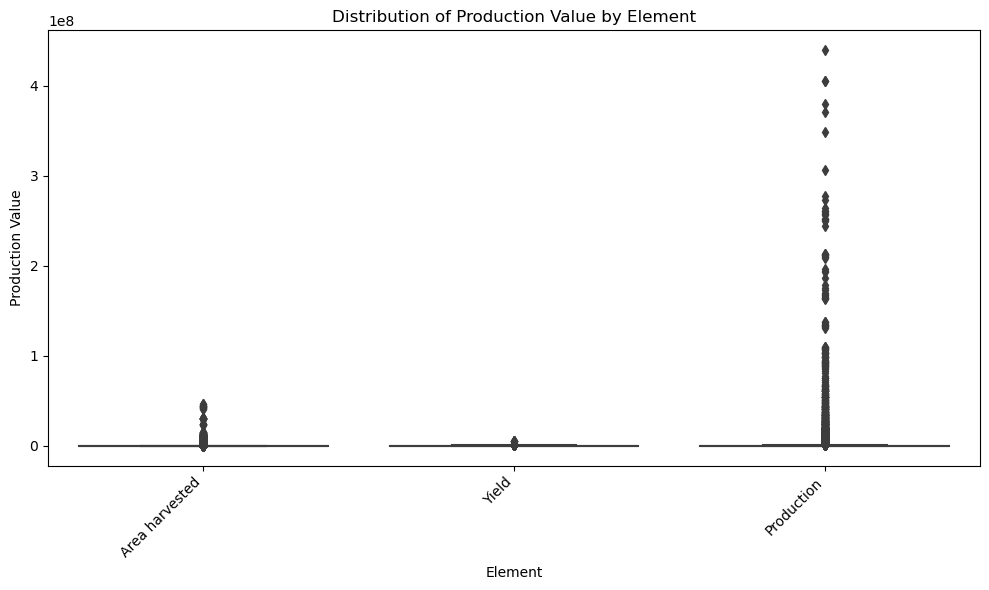

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Element', y='Value', data=data)
plt.xlabel('Element')
plt.ylabel('Production Value')
plt.title('Distribution of Production Value by Element')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Element', ylabel='Value'>

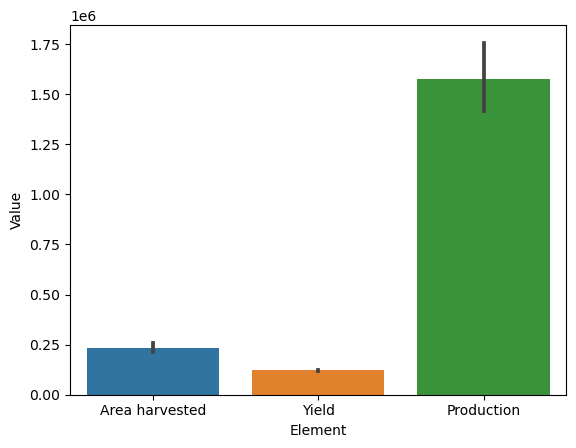

In [46]:
sns.barplot(data = data, x= 'Element', y = 'Value')

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='Unit', ylabel='Value'>

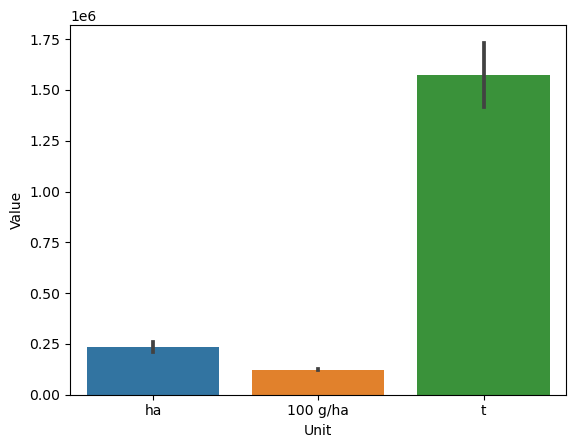

In [47]:
sns.barplot(data = data, x= 'Unit', y = 'Value')

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Afghanistan'),
  Text(1, 0, 'Armenia'),
  Text(2, 0, 'Azerbaijan'),
  Text(3, 0, 'Bahrain'),
  Text(4, 0, 'Bangladesh'),
  Text(5, 0, 'Bhutan'),
  Text(6, 0, 'Brunei Darussalam'),
  Text(7, 0, 'Cambodia'),
  Text(8, 0, 'China, Hong Kong SAR'),
  Text(9, 0, 'China, Macao SAR'),
  Text(10, 0, 'China, mainland'),
  Text(11, 0, 'China, Taiwan Province of'),
  Text(12, 0, 'Cyprus'),
  Text(13, 0, "Democratic People's Republic of Korea"),
  Text(14, 0, 'Georgia'),
  Text(15, 0, 'India'),
  Text(16, 0, 'Indonesia'),
  Text(17, 0, 'Iran (Islamic Republic of)'),
  Text(18, 0, 'Iraq'),
  Text(19, 0, 'Israel'),
  Text(20, 0, 'Japan'),
  Text(21, 0, 'Jordan'),
  Text(22, 0, 'Kazakhstan'),
  Text(23, 0, 'Kuwait'),
  Text(24, 0, 'Kyrgyzstan'),
  Text(25, 0, "L

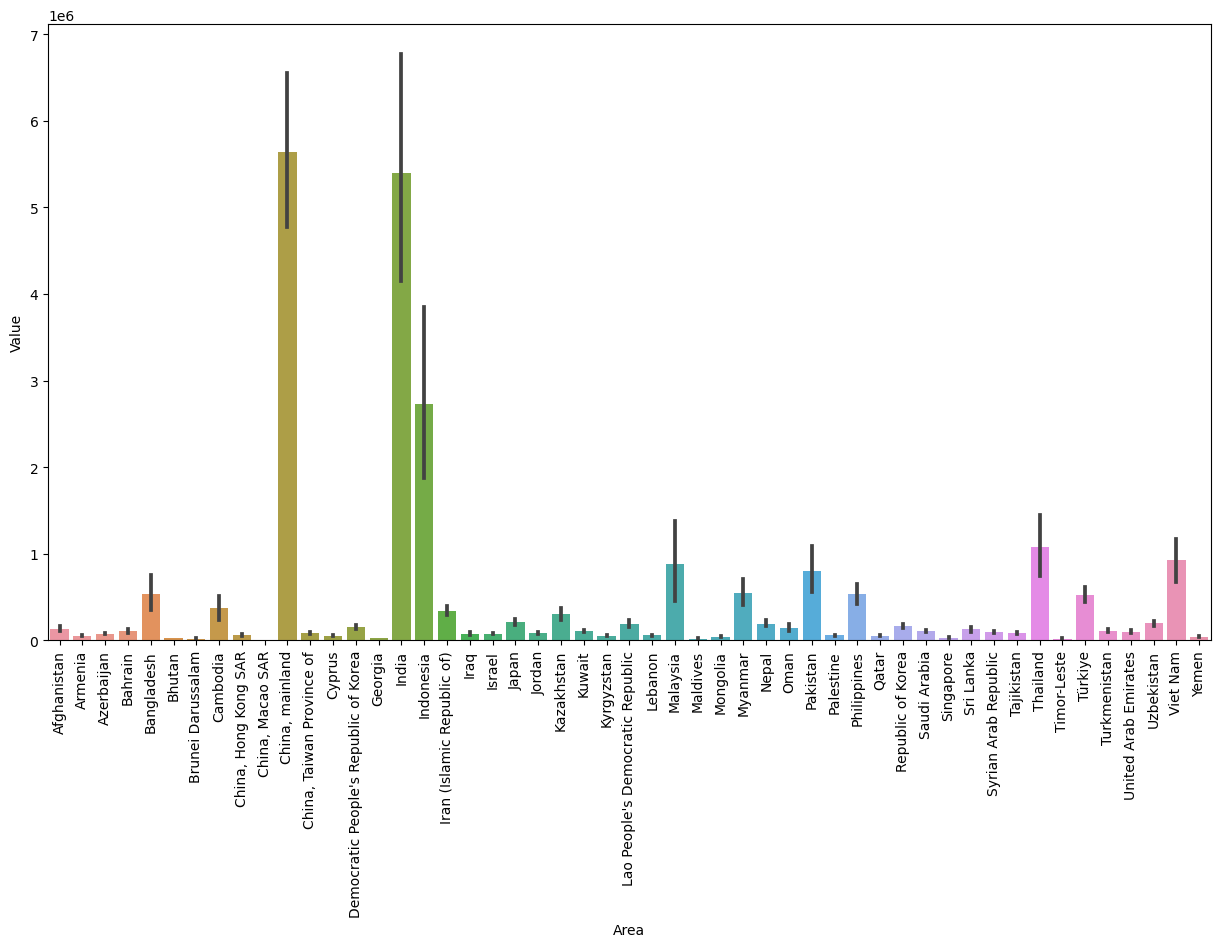

In [51]:
#  Examining the average price trends across regions.
plt.figure(figsize = [15, 8])
sns.barplot(data = data, y = 'Value', x = 'Area')
plt.xticks(rotation=90)

In [53]:
pivot_type3 = data.pivot_table(index= ['Area'], columns=['Element'], values=['Value'], aggfunc='mean')
pivot_type3

Value                \
Element                               Area harvested    Production   
Area                                                                 
Afghanistan                             8.595923e+04  2.354269e+05   
Armenia                                 5.237942e+03  4.243150e+04   
Azerbaijan                              2.254488e+04  1.096298e+05   
Bahrain                                 1.676488e+02  1.681363e+03   
Bangladesh                              2.420531e+05  1.155167e+06   
Bhutan                                  1.074635e+03  5.338802e+03   
Brunei Darussalam                       5.306243e+02  7.288528e+02   
Cambodia                                1.595506e+05  7.657368e+05   
China, Hong Kong SAR                    1.413429e+02  4.394355e+03   
China, Macao SAR                        1.614286e+01  2.733125e+01   
China, Taiwan Province of               9.014449e+03  1.025856e+05   
China, mainland                         1.527063e+06  1.401585e+07   
Cyprus                                  9.136241e+02  5.950294e+03   
Democratic People's Republic of Korea   7.325726e+04  2.828399e+05   
Georgia                                 6.378749e+03  2.545373e+04   
India                                   2.495472e+06  1.185267e+07   
Indonesia                               7.503809e+05  6.343134e+06   
Iran (Islamic Republic of)              1.426583e+05  6.725766e+05   
Iraq                                    3.900930e+04  1.138753e+05   
Israel                                  4.040955e+03  4.558686e+04   
Japan                                   3.357557e+04  3.932132e+05   
Jordan                                  2.803288e+03  3.638871e+04   
Kazakhstan                              3.012653e+05  4.580417e+05   
Kuwait                                  3.206107e+02  1.196330e+04   
Kyrgyzstan                              1.322974e+04  6.976705e+04   
Lao People's Democratic Republic        5.125221e+04  3.807540e+05   
Lebanon                                 3.997884e+03  3.898964e+04   
Malaysia                                1.515807e+05  2.043228e+06   
Maldives                                1.715461e+02  4.772696e+02   
Mongolia                                2.827433e+04  4.408782e+04   
Myanmar                                 3.767688e+05  1.083691e+06   
Nepal                                   9.052877e+04  3.765224e+05   
Oman                                    2.241801e+03  4.379647e+04   
Pakistan                                2.825165e+05  1.845244e+06   
Palestine                               1.729412e+03  1.280199e+04   
Philippines                             2.012689e+05  1.179420e+06   
Qatar                                   1.813892e+02  3.705720e+03   
Republic of Korea                       2.334717e+04  2.864082e+05   
Saudi Arabia                            1.478028e+04  1.504777e+05   
Singapore                               7.763710e+01  7.189145e+03   
Sri Lanka                               5.153121e+04  2.251513e+05   
Syrian Arab Republic                    5.762375e+04  1.175438e+05   
Tajikistan                              1.828587e+04  1.243244e+05   
Thailand                                2.946414e+05  2.446753e+06   
Timor-Leste                             4.714585e+03  9.289178e+03   
Turkmenistan                            4.834835e+04  1.449427e+05   
Türkiye                                 1.859850e+05  1.117474e+06   
United Arab Emirates                    1.488446e+03  3.012250e+04   
Uzbekistan                              4.651204e+04  3.672857e+05   
Viet Nam                                3.049146e+05  2.035657e+06   
Yemen                                   1.737179e+04  4.595067e+04   

                                                      
Element                                        Yield  
Area                                                  
Afghanistan                             59731.088803  
Armenia                                114147.

In [33]:
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')
pivot_tab = data.pivot_table(index='Year', columns='Element', values='Value', aggfunc='mean')
sem_tab = data.pivot_table(index='Year', columns='Element', values='Value', aggfunc=lambda x: np.std(x) / np.sqrt(len(x)))
sem_tab

#The Standard Error of the Mean (SEM) 
#measures how much the sample mean (average) of the data is likely to differ from the true population mean

Element  Area harvested     Production        Yield
Year                                               
2016       34208.302392  208791.143233  3057.222283
2017       34226.289928  208855.482977  3375.607567
2018       34052.046550  223395.188092  3677.595587
2019       33359.364872  229975.896785  3756.370406
2020       33970.465433  219254.034526  3614.761267
2021       34534.443269  228111.184962  3715.404382
2022       34470.207698  273386.156765  3698.801441

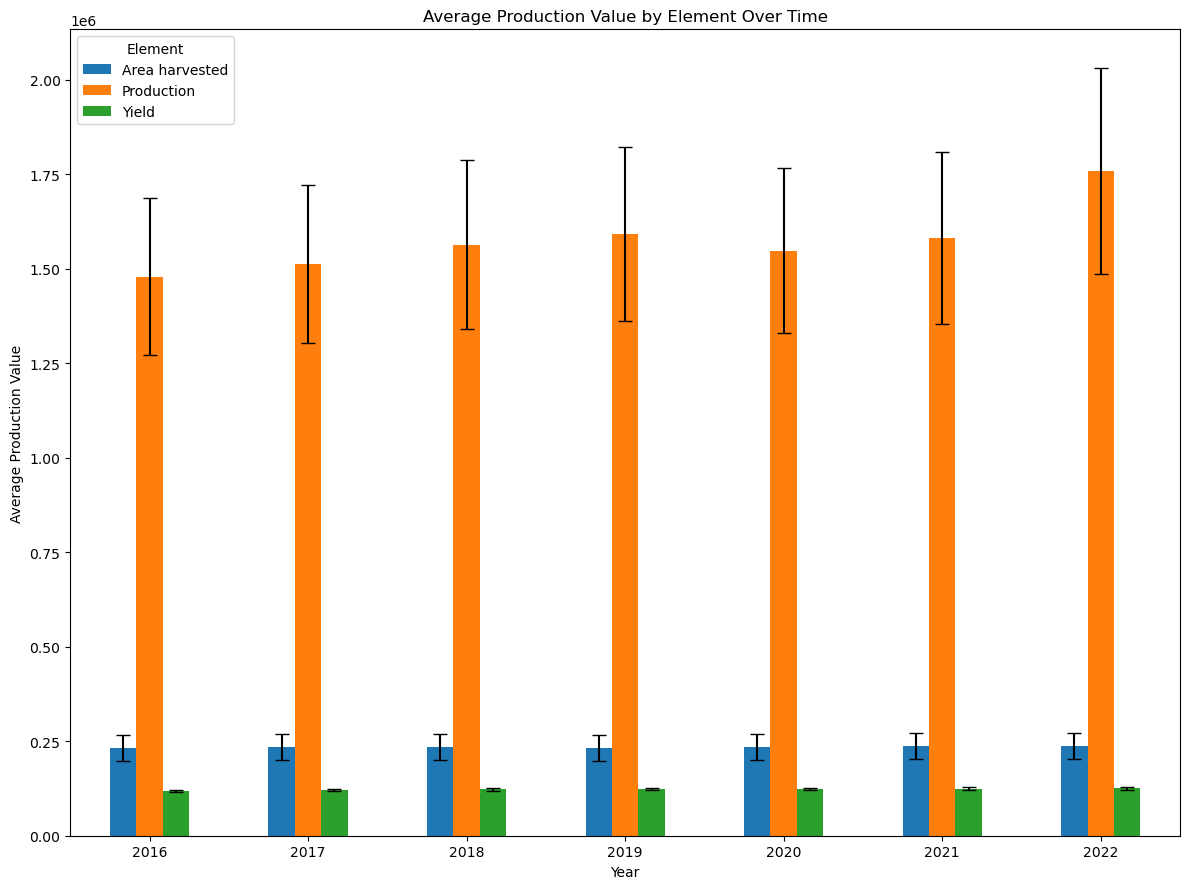

In [34]:
fig, ax = plt.subplots(figsize=(12, 9))
pivot_tab.plot(kind='bar', ax=ax, yerr=sem_tab, capsize=5)
plt.xticks(rotation=0) 
ax.set_xlabel("Year")
ax.set_ylabel("Average Production Value")
ax.set_title("Average Production Value by Element Over Time")
ax.legend(title='Element')
plt.tight_layout()
plt.show()

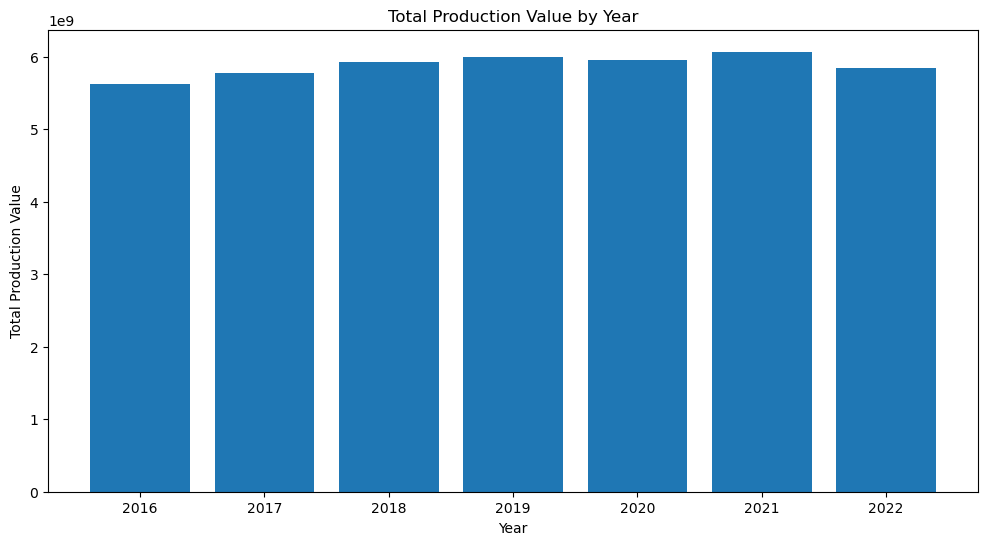

In [61]:
grouped_data = data.groupby('Year')['Value'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(grouped_data['Year'], grouped_data['Value'])
plt.xlabel('Year')
plt.ylabel('Total Production Value')
plt.title('Total Production Value by Year')
plt.show()

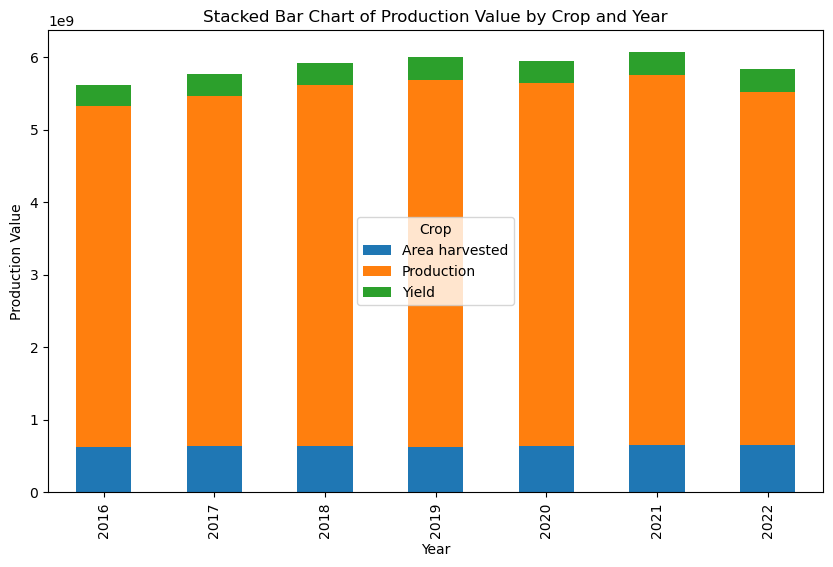

In [4122]:
grouped = data.groupby(['Year', 'Element'])['Value'].sum().unstack()

ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.title('Stacked Bar Chart of Production Value by Crop and Year')
plt.legend(title='Crop')
plt.show()

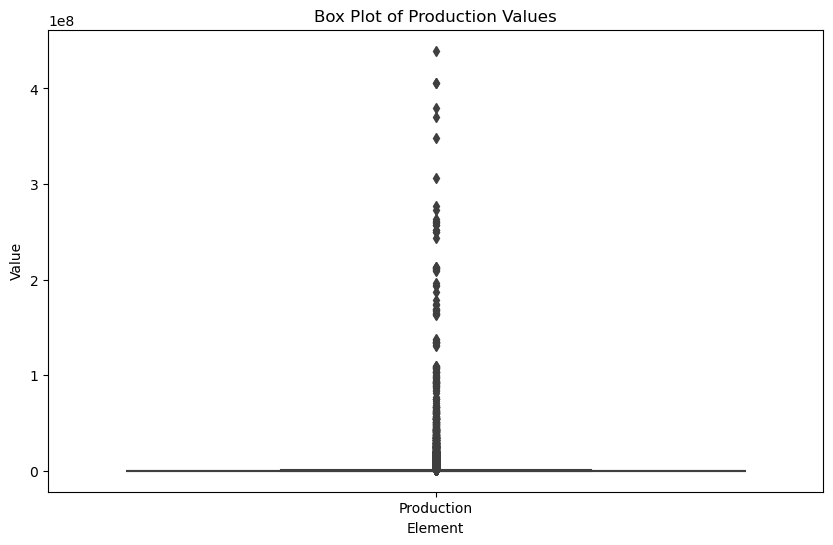

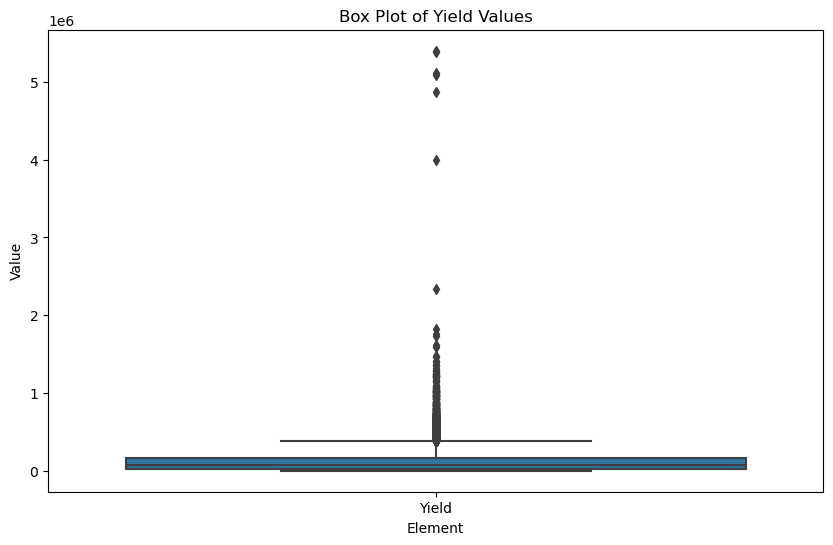

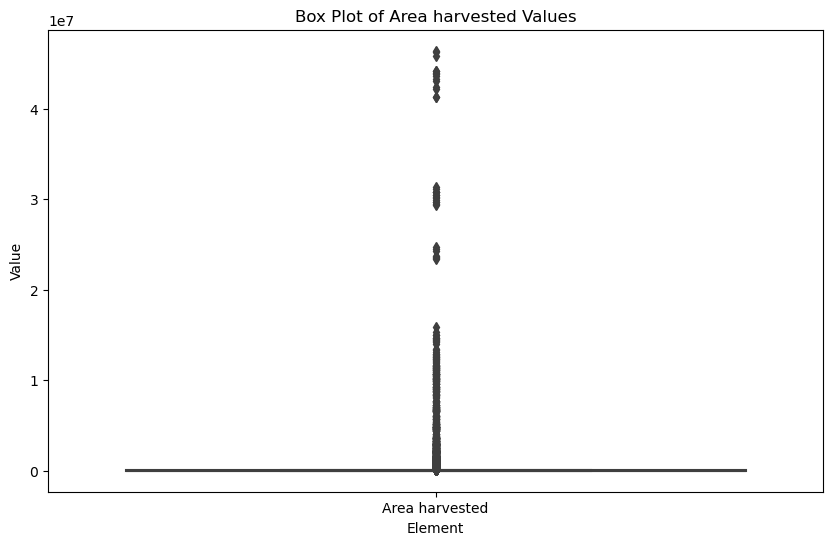

In [4598]:
elements = ['Production', 'Yield', 'Area harvested']

for element in elements:
    element_data = data[data['Element'] == element]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Element', y='Value', data=element_data)
    plt.title(f'Box Plot of {element} Values')
    plt.xlabel('Element')
    plt.ylabel('Value')
    plt.show()

<Figure size 1200x800 with 0 Axes>

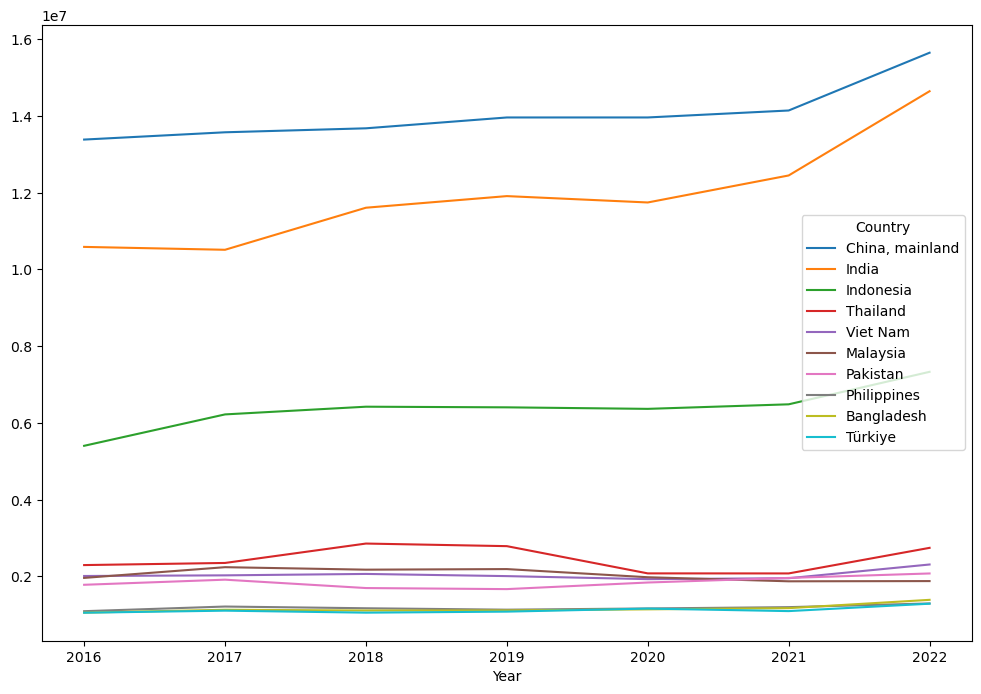

<Figure size 1200x800 with 0 Axes>

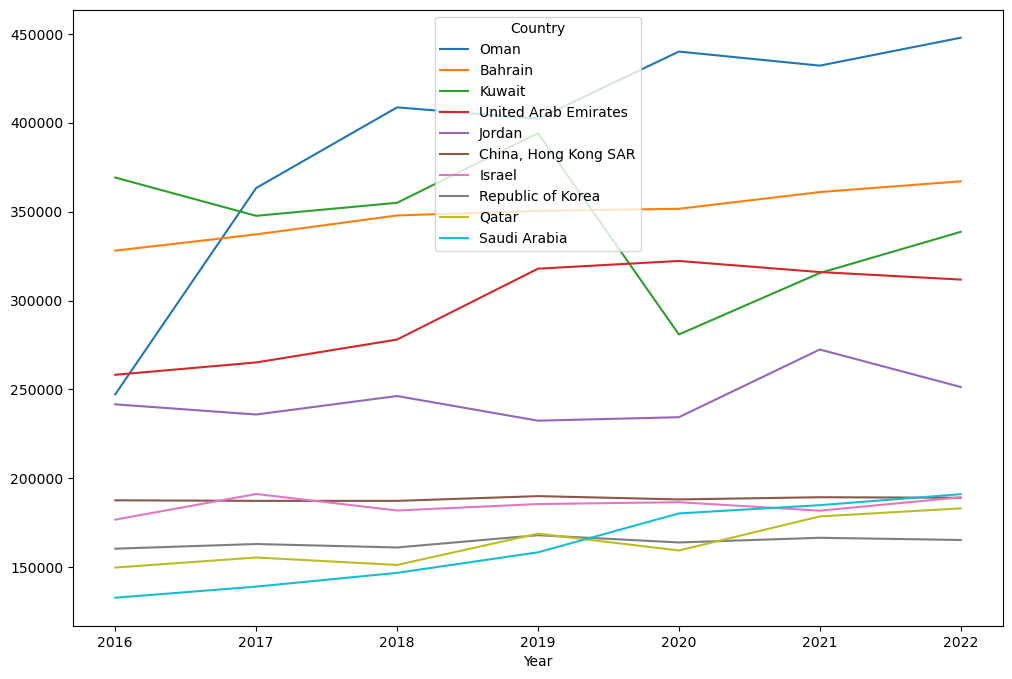

<Figure size 1200x800 with 0 Axes>

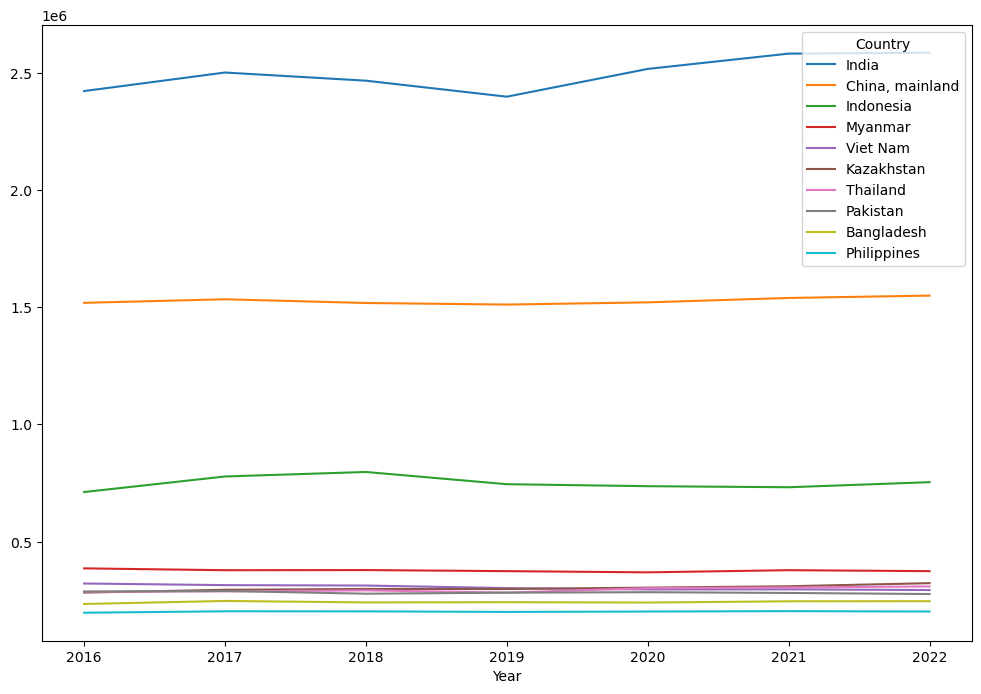

In [64]:
past_decade_data = data[data['Year'] >= 2010]
elements = ['Production', 'Yield', 'Area harvested']

top_n_countries = 10

for i, element in enumerate(elements):
    mean_values = past_decade_data[past_decade_data['Element'] == element].groupby(['Year', 'Area'])['Value'].mean().unstack()
    top_countries = mean_values.sum(axis=0).sort_values(ascending=False).head(top_n_countries).index
    mean_values = mean_values[top_countries]
    plt.figure(figsize=(12, 8))
    mean_values.plot(figsize=(12, 8))
    plt.xlabel('Year')
    plt.legend(title='Country')
    plt.show()

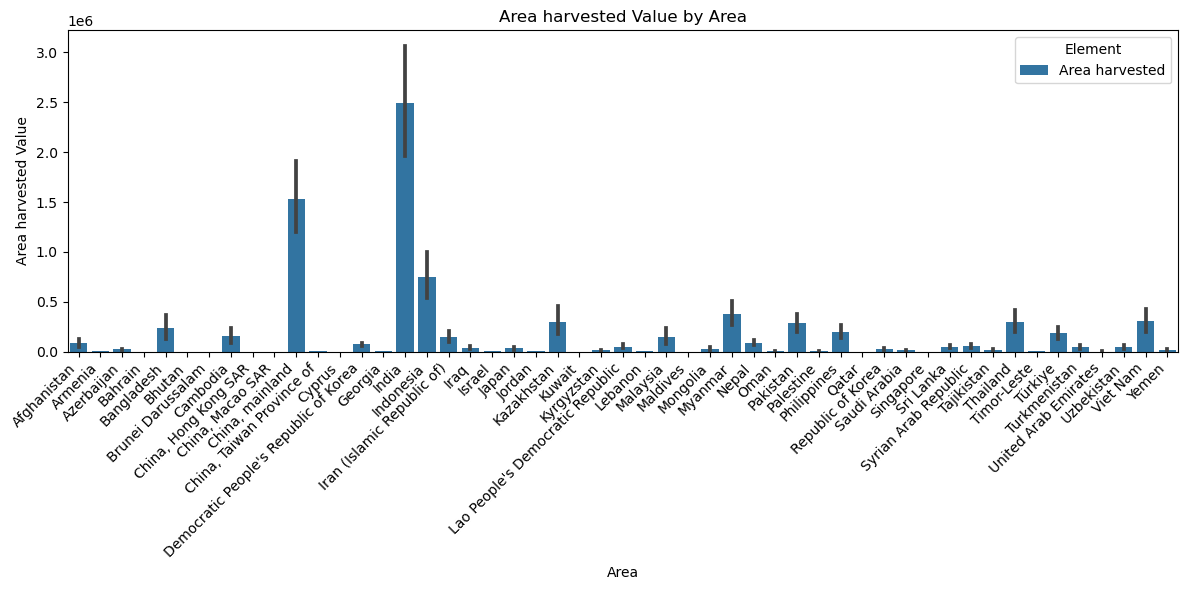

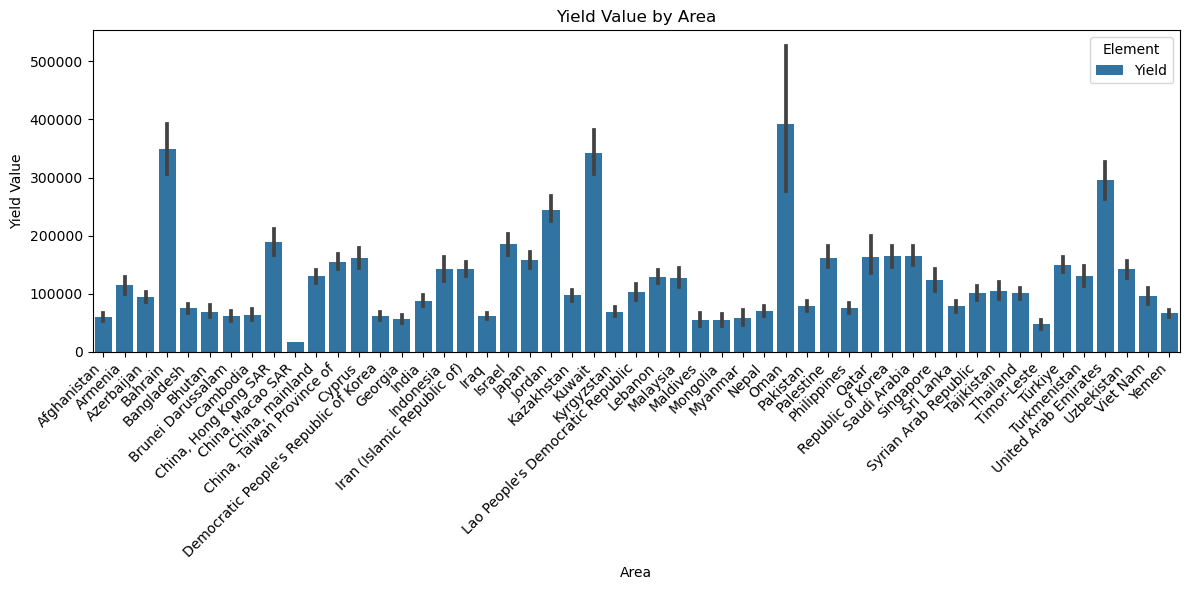

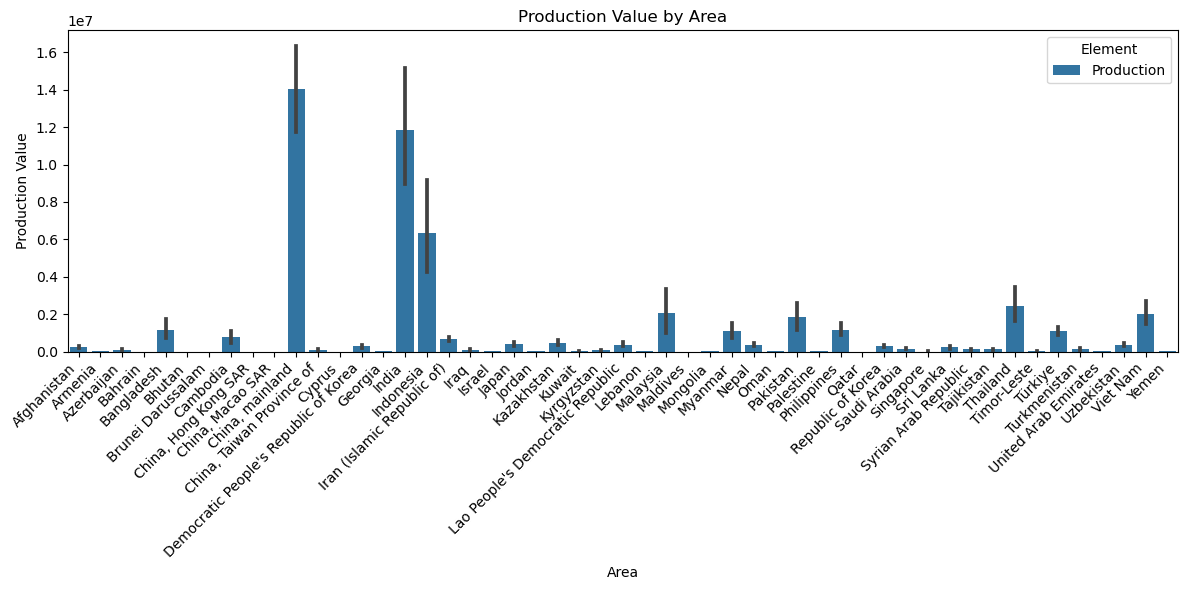

In [4596]:
# Unique elements in the dataset Method2
elements = data['Element'].unique()

for element in elements:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Area', y='Value', hue='Element', data=data[data['Element'] == element])
    plt.xlabel('Area')
    plt.ylabel(f'{element} Value')
    plt.title(f'{element} Value by Area')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Element')
    plt.tight_layout()
    plt.show()

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



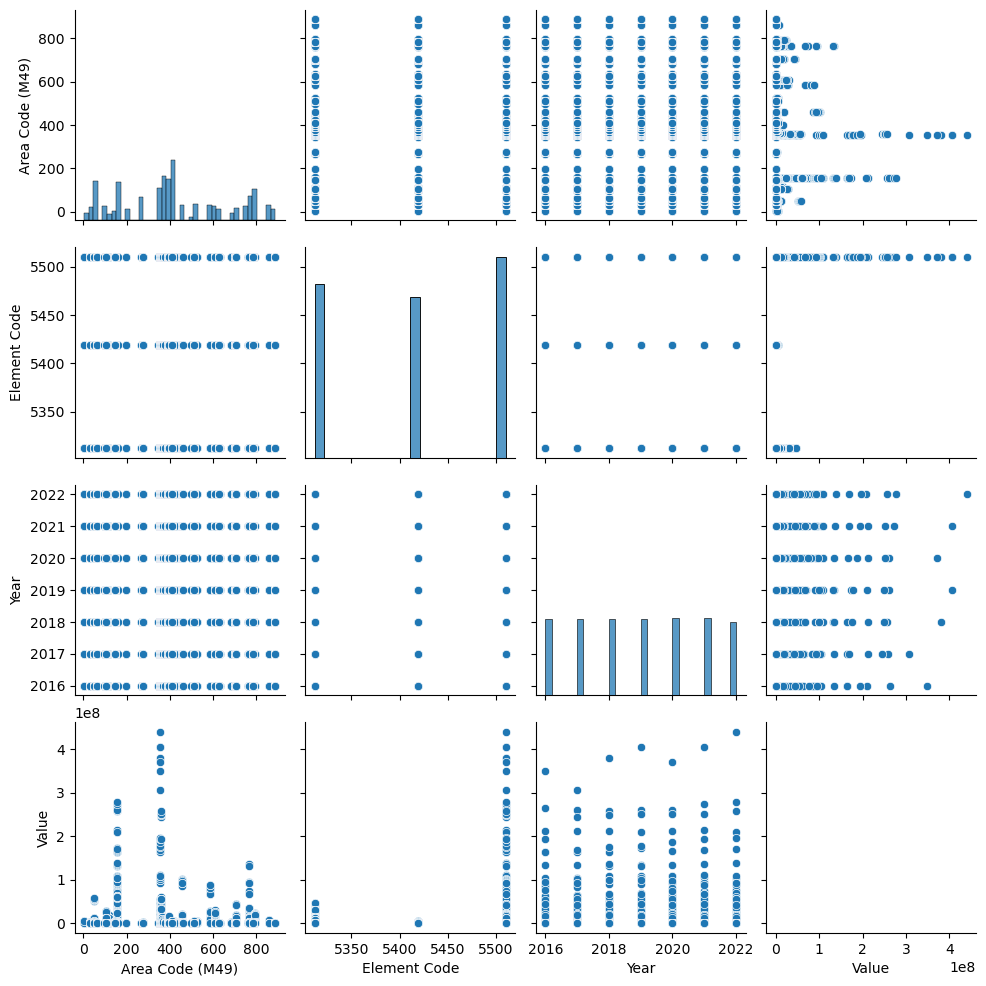

In [4126]:
# Pairplot to see relationships between numeric features
sns.pairplot(data)
plt.show()

In [4127]:
categorical_cols = ['Domain Code','Domain', 'Area', 'Element', 'Item', 'Unit', 'Flag', 'Flag Description']

In [65]:
# label encoding
le = LabelEncoder()
label_cols = ['Domain', 'Area', 'Element', 'Item', 'Unit', 'Flag', 'Flag Description']
for col in label_cols:
    data[col] = le.fit_transform(data[col])

In [66]:
data.head()

Domain  Area Code (M49)  Area  Element Code  Element Item Code (CPC)  Item  \
0       0                4     0          5312        0           01371     2   
1       0                4     0          5419        2           01371     2   
2       0                4     0          5510        1           01371     2   
3       0                4     0          5312        0           01371     2   
4       0                4     0          5419        2           01371     2   

   Year  Unit    Value  Flag  Flag Description  
0  2016     1  19481.0     0                 4  
1  2016     0  16859.0     0                 4  
2  2016     2  32843.0     0                 4  
3  2017     1  19793.0     0                 4  
4  2017     0  13788.0     0                 4

In [67]:
data.describe()

Domain  Area Code (M49)          Area  Element Code       Element  \
count  58606.0     58606.000000  58606.000000  58606.000000  58606.000000   
mean       0.0       417.389329     25.091663   5418.387315      0.975617   
std        0.0       247.220459     14.427496     82.598949      0.790181   
min        0.0         4.000000      0.000000   5312.000000      0.000000   
25%        0.0       196.000000     14.000000   5312.000000      0.000000   
50%        0.0       398.000000     24.000000   5419.000000      1.000000   
75%        0.0       608.000000     37.000000   5510.000000      2.000000   
max        0.0       887.000000     50.000000   5510.000000      2.000000   

               Item          Year          Unit         Value          Flag  \
count  58606.000000  58606.000000  58606.000000  5.860600e+04  58606.000000   
mean      89.787872   2018.987356      1.074736  7.029192e+05      0.776030   
std       51.966951      1.990686      0.818382  7.876711e+06      1.057192   
min        0.000000   2016.000000      0.000000  0.000000e+00      0.000000   
25%       46.000000   2017.000000      0.000000  2.034473e+03      0.000000   
50%       98.000000   2019.000000      1.000000  2.069875e+04      0.000000   
75%      133.000000   2021.000000      2.000000  1.184475e+05      1.000000   
max      176.000000   2022.000000      2.000000  4.394249e+08      4.000000   

       Flag Description  
count      58606.000000  
mean           2.718271  
std            1.621424  
min            0.000000  
25%            2.000000  
50%            4.000000  
75%            4.000000  
max            4.000000

In [35]:
data.describe(include=object)

Domain             Area     Element  \
count                          58606            58606       58606   
unique                             1               51           3   
top     Crops and livestock products  China, mainland  Production   
freq                           58606             2600       21979   

       Item Code (CPC)                            Item   Unit   Flag  \
count            58606                           58606  58606  58606   
unique             177                             177      3      5   
top           01290.90  Other vegetables, fresh n.e.c.      t      A   
freq              1064                            1064  21979  32852   

       Flag Description  
count             58606  
unique                5  
top     Official figure  
freq              32852

In [72]:
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

In [73]:
# Correlation matrix
correlation_matrix = numeric_cols.corr()

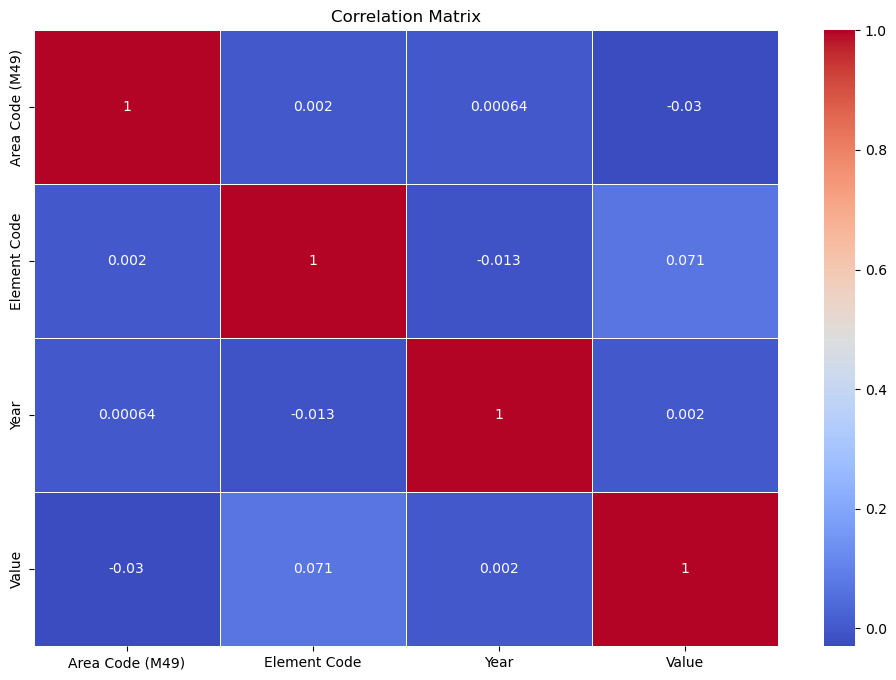

In [74]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

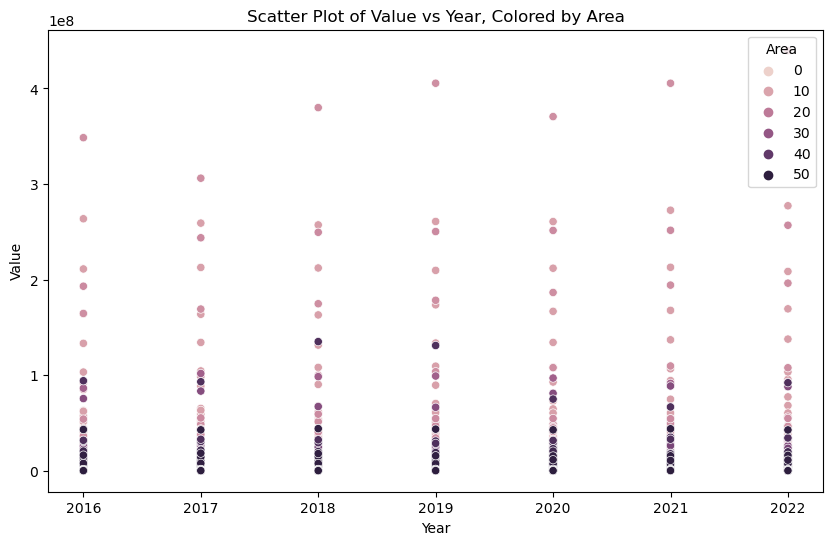

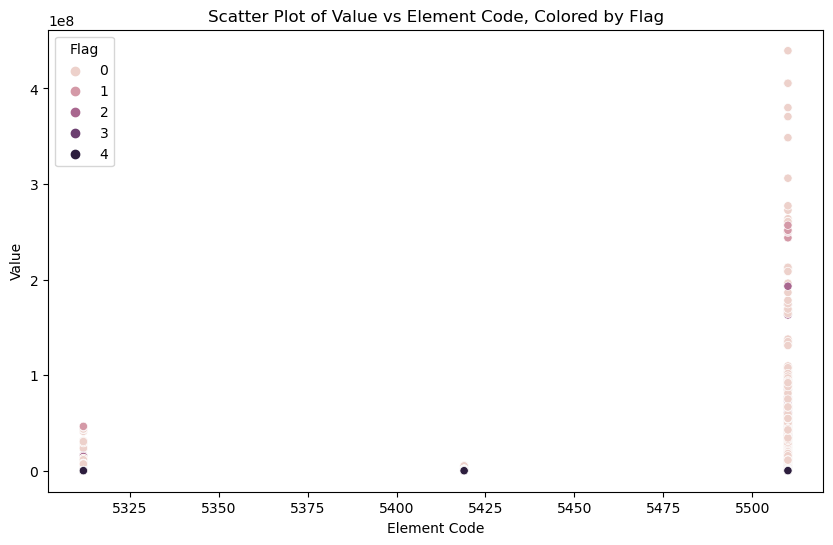

In [4135]:
# Creating scatter plots for specific pairs of numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Year', y='Value', hue='Area')
plt.title('Scatter Plot of Value vs Year, Colored by Area')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Area')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Element Code', y='Value', hue='Flag')
plt.title('Scatter Plot of Value vs Element Code, Colored by Flag')
plt.xlabel('Element Code')
plt.ylabel('Value')
plt.legend(title='Flag')
plt.show()

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Year', ylabel='Value'>

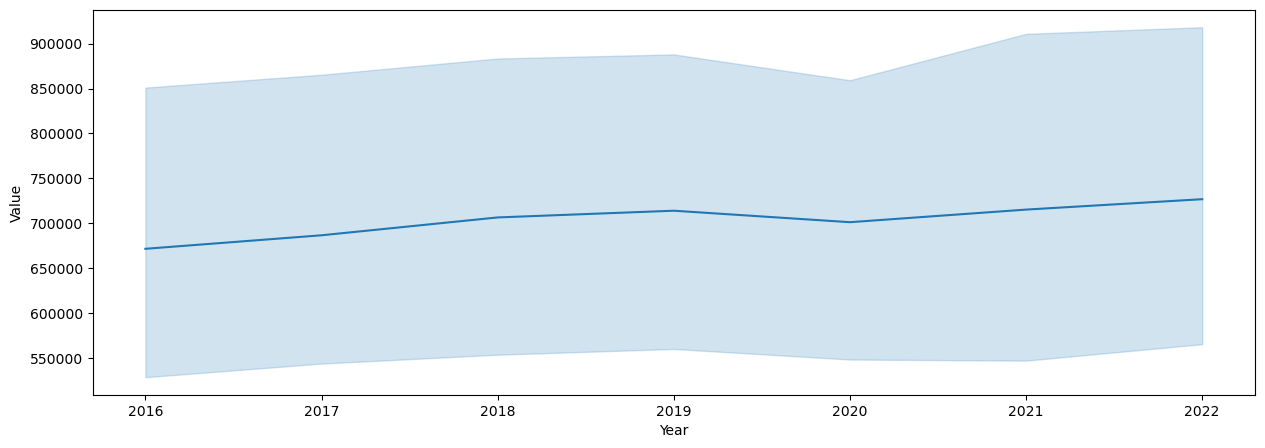

In [4136]:
# ploting the line chart to check the devaiation of the value over the year
plt.figure(figsize = [15, 5])
sns.lineplot(data = data, x = 'Year', y = 'Value')

In [75]:
import plotly.express as px
import matplotlib.pyplot as plt
import squarify

In [36]:
data['Value'] = data['Value'].replace(0, 1e-10) # we replaced the 0 with a very small value 

In [37]:
data_grouped = data.groupby(['Domain', 'Area', 'Item'], as_index=False)['Value'].sum()

In [38]:
fig = px.treemap(data_grouped, path=['Domain', 'Area', 'Item'],values='Value',color='Value',title="Treemap of Values by Domain, Area, and Item")

In [39]:
fig.show() #better to do before encoding

In [85]:
# Filter data for the past decade
past_decade_data = data[data['Year'] >= 2010]

In [86]:
# Group by year and item, then calculate the mean value
mean_yield = past_decade_data.groupby(['Year', 'Item'])['Value'].mean().unstack()
mean_yield

Item          0            1             2              3              4    \
Year                                                                         
2016  28184.81625  5982.213333  22480.778088   64809.341515  724815.232857   
2017  28405.20500  5992.710000  23985.101324  117130.163333  729323.198690   
2018  28677.80625  6004.280000  26992.894559  121623.451935  709218.500833   
2019  28495.03750  6003.350000  26976.796324  118578.988824  749073.945952   
2020  28375.26375  5992.406667  26342.730423  137096.456471  786921.524048   
2021  28471.95250  5993.103333  26737.074366  137885.380294  816448.506667   
2022  28570.25250  5994.136667  27443.636197  139422.486471  838095.543929   

Item           5              6             7              8             9    \
Year                                                                           
2016  52688.196104   83331.277273  45562.360000  327516.278276  51686.697813   
2017  59813.081923   80400.988485  46237.506061  330386.252414  47983.146216   
2018  55282.307179   83140.568182  51924.318788  333726.001034  53379.542821   
2019  56792.789359   89924.496364  50794.061515  343349.183103  55558.591795   
2020  56223.485897  112427.813333  46773.224848  348777.982069  61614.602051   
2021  56136.579231  122333.020909  47460.333030  344276.873793  60415.368462   
2022  58771.648974  124778.366667  47582.916970  348382.139655  60904.171026   

Item  ...           167            168           169          170  \
Year  ...                                                           
2016  ...   7975.481481  197033.333333  64081.923898  2960.724444   
2017  ...  10457.920741  179330.333333  60240.963529  2726.560000   
2018  ...  10335.571200  168916.666667  58073.038390  2636.234444   
2019  ...   8776.813600  178252.693333  63789.123729  2371.598889   
2020  ...   6926.249630  187511.346667  58498.152333  2348.277778   
2021  ...   7188.112222  187226.910000  58329.963000  2512.022222   
2022  ...   7333.057407  187033.236667  57869.294333  2519.941111   

Item          171           172            173           174            175  \
Year                                                                          
2016  8653.479259  44861.393182  806750.265750  3.909157e+06  135695.532222   
2017  7293.275926  44401.376154  792281.853833  3.958678e+06  139774.990556   
2018  5086.425833  40516.716462  773316.880750  3.852868e+06  146130.330556   
2019  6825.903333  44866.156970  776998.104750  3.958888e+06  138622.032778   
2020  6785.085417  48720.244242  782686.052583  4.048979e+06  132372.213500   
2021  6145.395833  50082.210606  792903.088417  4.015180e+06  126296.219474   
2022  5911.414583  55316.044091  785668.606500  4.011915e+06            NaN   

Item           176  
Year                
2016  51450.830000  
2017  55151.926667  
2018  54833.404444  
2019  58756.942222  
2020  49337.088333  
2021  53669.968333  
2022  52848.180000  

[7 rows x 177 columns]

In [87]:
top_10_items = mean_yield.mean(axis=0).sort_values(ascending=False).head(10).index
top_10_items

Index([94, 157, 116, 142, 174, 78, 141, 115, 114, 24], dtype='int32', name='Item')

In [88]:
mean_yield_top_10 = mean_yield[top_10_items]
mean_yield_top_10

Item           94            157           116           142           174  \
Year                                                                         
2016  1.721936e+07  1.044175e+07  7.301214e+06  7.882180e+06  3.909157e+06   
2017  2.124076e+07  1.005048e+07  8.680832e+06  7.918424e+06  3.958678e+06   
2018  2.146422e+07  1.166537e+07  9.021241e+06  7.892696e+06  3.852868e+06   
2019  2.160676e+07  1.185929e+07  8.792547e+06  7.800217e+06  3.958888e+06   
2020  2.155660e+07  1.059792e+07  9.558636e+06  7.965125e+06  4.048979e+06   
2021  2.129763e+07  1.111364e+07  1.015783e+07  8.131524e+06  4.015180e+06   
2022  2.178573e+07  1.186827e+07           NaN  8.025553e+06  4.011915e+06   

Item           78            141           115           114           24   
Year                                                                        
2016  3.325633e+06  2.256663e+06  1.789748e+06  1.809577e+06  1.862653e+06  
2017  3.362762e+06  2.168356e+06  2.098170e+06  1.807552e+06  1.800510e+06  
2018  3.383984e+06  2.723822e+06  2.252303e+06  1.830590e+06  1.727139e+06  
2019  3.319474e+06  2.842788e+06  2.680012e+06  1.918140e+06  1.771911e+06  
2020  3.318262e+06  2.334224e+06  2.595323e+06  1.870216e+06  1.772130e+06  
2021  3.465350e+06  2.677994e+06  2.617114e+06  1.882735e+06  1.973401e+06  
2022  3.600624e+06           NaN           NaN  1.898906e+06  1.940094e+06

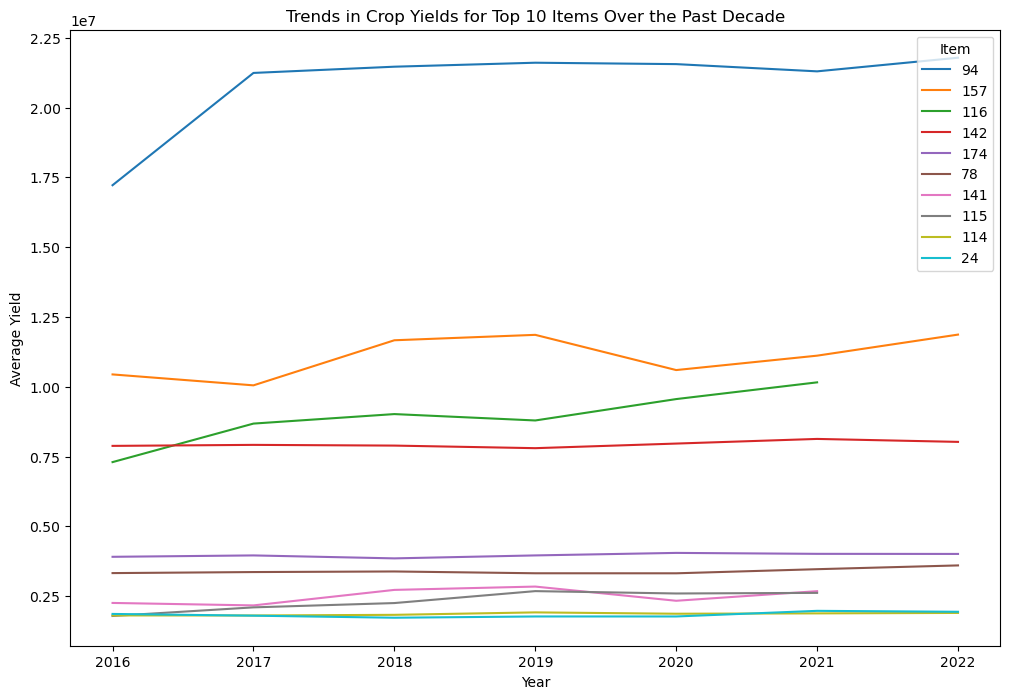

In [89]:
mean_yield_top_10.plot(figsize=(12, 8))
plt.title('Trends in Crop Yields for Top 10 Items Over the Past Decade')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.legend(title='Item')
plt.show()

In [90]:
# Calculating the average yield per item
avg_yield_per_item = data.groupby('Item')['Value'].mean().sort_values(ascending=False)

In [91]:
avg_yield_per_item

Item
94     2.088158e+07
157    1.108251e+07
116    8.915783e+06
142    7.945434e+06
174    3.965095e+06
           ...     
170    2.582194e+03
62     2.060056e+03
134    1.000000e-10
23     1.000000e-10
68     1.000000e-10
Name: Value, Length: 177, dtype: float64

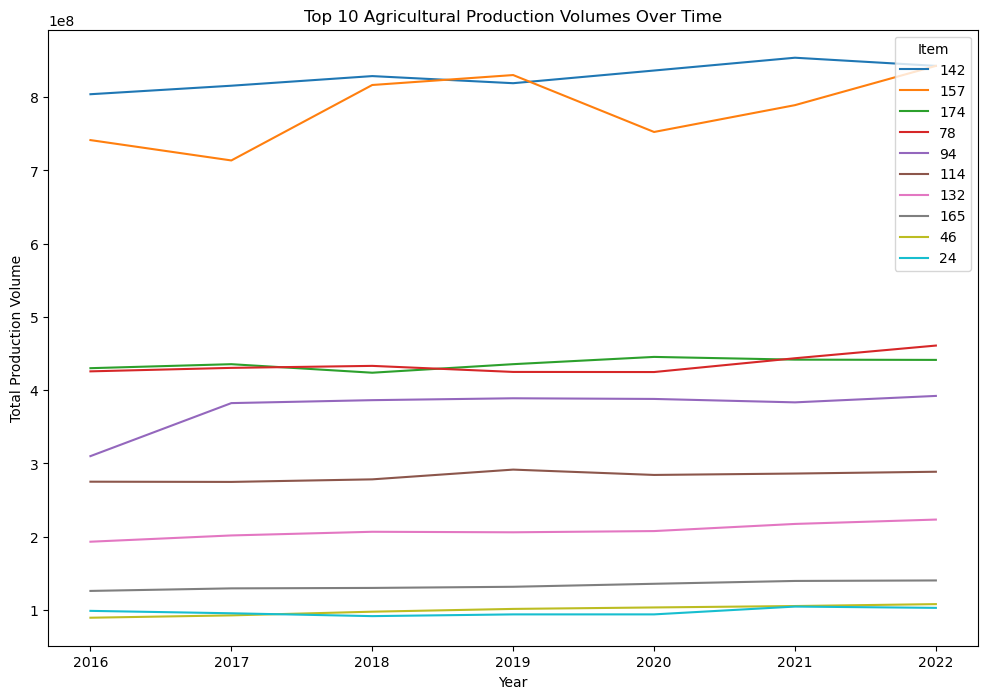

In [92]:
# Grouping by year and item, then sum the values
production_volumes = data.groupby(['Year', 'Item'])['Value'].sum().unstack()
top_10_items = production_volumes.sum(axis=0).sort_values(ascending=False).head(10).index
production_volumes_top_10 = production_volumes[top_10_items]

production_volumes_top_10.plot(figsize=(12, 8))
plt.title('Top 10 Agricultural Production Volumes Over Time')
plt.xlabel('Year')
plt.ylabel('Total Production Volume')
plt.legend(title='Item')
plt.show()

In [93]:
# Calculating the growth in production over the years
production_growth = data.groupby('Item')['Value'].apply(lambda x: x.iloc[-1] - x.iloc[0]).sort_values(ascending=False)
production_growth


Item
142    42553338.69
94     19039557.00
24     10626748.72
116     2940000.00
38      1887182.06
          ...     
139     -173668.62
11      -195208.00
138     -317344.59
64      -677437.42
174    -2200210.00
Name: Value, Length: 177, dtype: float64

In [94]:
# Grouping by item and sum the production values
major_crops = data.groupby('Item')['Value'].sum().sort_values(ascending=False)
major_crops

Item
142    5.800167e+09
157    5.485843e+09
174    3.053123e+09
78     3.043340e+09
94     2.631079e+09
           ...     
1      1.258866e+05
136    3.504400e+04
134    1.400000e-09
23     1.400000e-09
68     1.400000e-09
Name: Value, Length: 177, dtype: float64

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



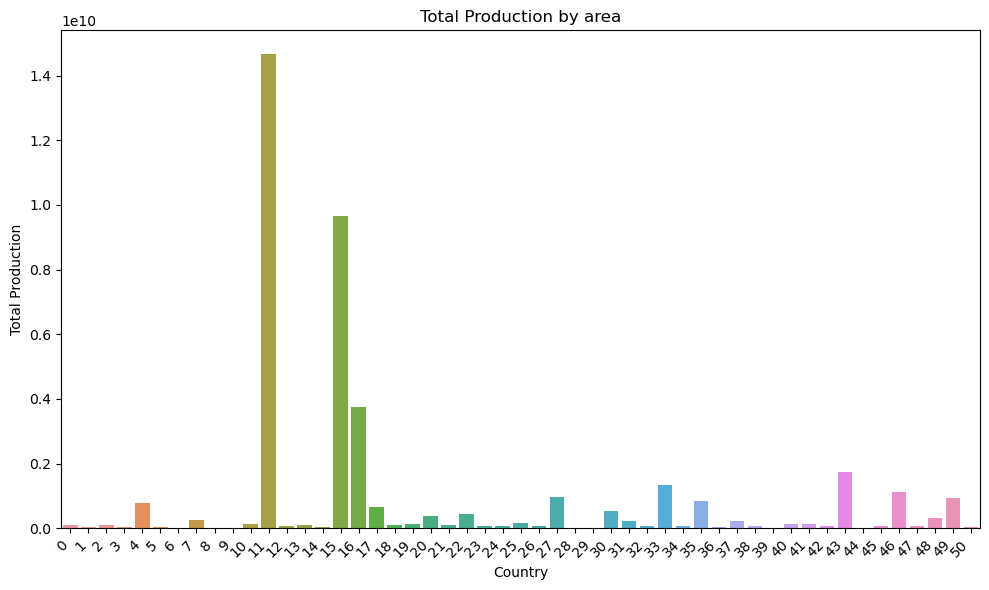

In [95]:
#Bar chart of production by country
production_by_country = data.groupby('Area')['Value'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=production_by_country.index, y=production_by_country.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Total Production')
plt.title('Total Production by area')
plt.tight_layout()
plt.show()

In [97]:
# Grouping by item and summing the production values
major_crops = data.groupby('Item')['Value'].sum().sort_values(ascending=False)
major_crops

Item
142    5.800167e+09
157    5.485843e+09
174    3.053123e+09
78     3.043340e+09
94     2.631079e+09
           ...     
1      1.258866e+05
136    3.504400e+04
134    1.400000e-09
23     1.400000e-09
68     1.400000e-09
Name: Value, Length: 177, dtype: float64

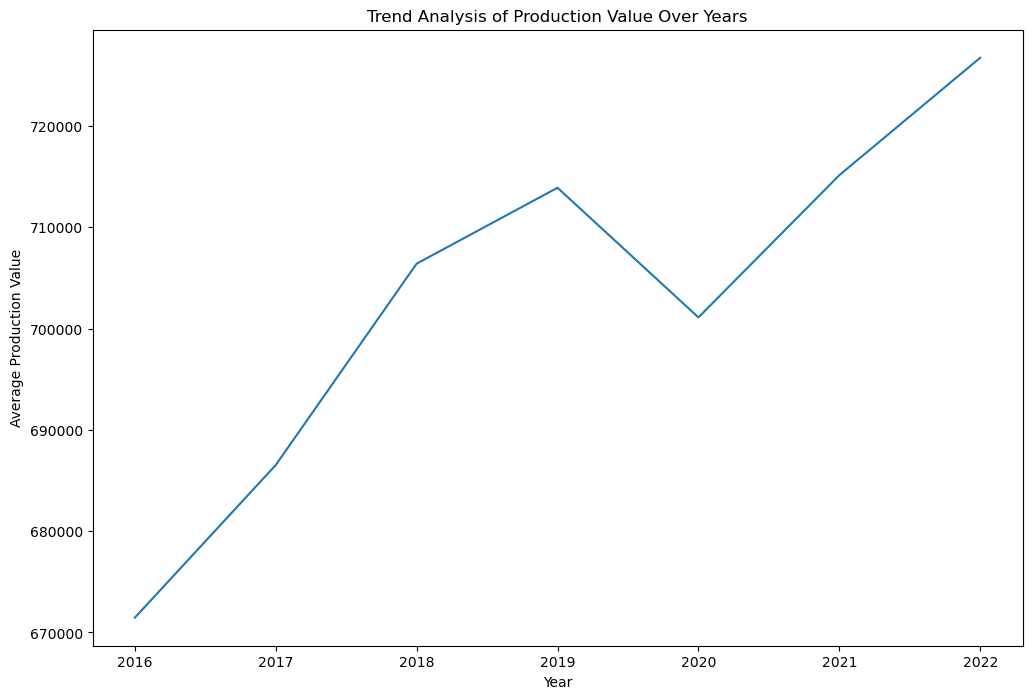

In [98]:
# Grouping by year and calculate the mean production value
trend_analysis = data.groupby('Year')['Value'].mean()

# Plotting the trend analysis
trend_analysis.plot(figsize=(12, 8))
plt.title('Trend Analysis of Production Value Over Years')
plt.xlabel('Year')
plt.ylabel('Average Production Value')
plt.show()

In [41]:
data['Item Code (CPC)'] = data['Item Code (CPC)'].astype(str).str.rstrip('f')


In [42]:
data['Item Code (CPC)'].unique()


array(['01371', '01654', '01341', '01343', '0115', '01229', '01921.02',
       '0143', '2168', '01315', '01330', '01441', '0112', '0118', '23540',
       '01442', '21691.12', '21691.07', '2167', '01450', '01253.02',
       '01323', '01355.90', '01329', '01359.90', '01379.90', '01709.90',
       '01699', '01349.20', '01290.90', '01345', '01342.01', '01375',
       '01346', '01510', '2351', '0113', '01921.01', '01444', '01801',
       '01802', '01445', '21631.01', '01376', '01221', '0111', '01701',
       '24310.01', '01212', '01251', '01213', '01199.90', '01344.02',
       '01703', '01232', '01233', '01252', '01374', '01704', '21700.02',
       '01270', '0117', '01319', '01705', '01242', '01342.02', '0116',
       '01344.01', '01234', '01970', '01709.01', '24212.02', '01702',
       '01373', '01231', '01355.02', '01351.01', '01322', '21691.02',
       '01253.01', '01241.90', '01449.90', '01359.01', '01235',
       '01353.01', '0114', '2161', '0141', '01324', '01620', '01312',
       '01

In [109]:
x = data.drop(columns=['Value'])
y = data['Value']

In [110]:
data['Item Code (CPC)'].value_counts()

Item Code (CPC)
01290.90    1064
01359.90     979
01510        924
01212        924
01234        915
            ... 
01219.01      14
01499.01      14
01929.03      12
01499.06      12
01194          9
Name: count, Length: 177, dtype: int64

In [111]:
# performing feature scaling
from sklearn.preprocessing import MinMaxScaler

In [112]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
scaled_x = pd.DataFrame(x_scaled, 
                         columns=x.columns)

In [113]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y ,test_size = 0.25,
                                                    random_state=42)

In [114]:
# Initialize the model
model = LinearRegression()

In [115]:
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [116]:
# Make predictions
y_pred = model.predict(x_test)

In [117]:
print(model.score(x_train,y_train))

0.01208516772781465


In [118]:
print(model.score(x_test,y_test))

0.011368068118531083


In [119]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [120]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 63772751522947.055
R-squared (R2): 0.011368068118531083


In [121]:
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))

print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1336301.9306273013
MSE:  63772751522947.055
RMSE: 7985784.339872137


In [122]:
# applying ridge and lasso regression 

In [123]:
from sklearn.linear_model import Ridge

In [124]:
ridge_model = Ridge(alpha=1.0)

In [125]:
ridge_model.fit(x_train, y_train)

Ridge()

In [126]:
y_pred = ridge_model.predict(x_test)

In [127]:
print(ridge_model.score(x_train,y_train))

0.012126444878359899


In [128]:
print(ridge_model.score(x_test,y_test))

0.011346256503467322


In [129]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 63774158504314.86


In [130]:
r2 = r2_score(y_test, y_pred)

In [131]:
r2

0.011346256503467322

In [132]:
# Lasso regression

In [133]:
from sklearn.linear_model import Lasso

In [134]:
lasso_model = Lasso(alpha=0.1)

In [135]:
lasso_model.fit(x_train, y_train)

C:\Users\satti\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+16, tolerance: 2.691e+14



Lasso(alpha=0.1)

In [136]:
y_pred = lasso_model.predict(x_test)

In [137]:
print(lasso_model.score(x_train,y_train))

0.012126444897563537


In [138]:
print(lasso_model.score(x_test,y_test))

0.011346201134928013


In [139]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 63774162075921.23


In [140]:
r2 = r2_score(y_test, y_pred)

In [141]:
r2

0.011346201134928013

In [142]:
# 3. Applying Ridge
from sklearn.model_selection import GridSearchCV

In [143]:
alphas = np.logspace(-5,3,20)

In [144]:
# Creating an instance to pass with param_grid in GridSearchCV
from sklearn import linear_model

In [145]:
ridge_estimator = linear_model.Ridge()

In [146]:
ridge_clf = GridSearchCV(ridge_estimator, param_grid=dict(alpha=alphas), cv=10)

In [147]:
ridge_clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 2.63665090e-05, 6.95192796e-05, 1.83298071e-04,
       4.83293024e-04, 1.27427499e-03, 3.35981829e-03, 8.85866790e-03,
       2.33572147e-02, 6.15848211e-02, 1.62377674e-01, 4.28133240e-01,
       1.12883789e+00, 2.97635144e+00, 7.84759970e+00, 2.06913808e+01,
       5.45559478e+01, 1.43844989e+02, 3.79269019e+02, 1.00000000e+03])})

In [148]:
best_params = ridge_clf.best_params_

In [149]:
# Best parameters can also be found as follows:

ridge_clf.best_estimator_

Ridge(alpha=1000.0)

In [150]:
best_score_ridge = ridge_clf.best_score_
best_score_ridge

0.011165537896002975

In [151]:
ridge_clf_best_params = linear_model.Ridge(alpha=0.0615)

In [152]:
ridge_clf_best_params.fit(x_train,y_train)

Ridge(alpha=0.0615)

In [153]:
train_score_ridge_best_params = ridge_clf_best_params.score(x_train,y_train)

In [154]:
test_score_ridge_best_params = ridge_clf_best_params.score(x_test,y_test)

In [155]:
y_pred_ridge = ridge_clf_best_params.predict(x_test)

In [156]:
train_score_ridge_best_params

0.01212644489749548

In [157]:
test_score_ridge_best_params

0.011346203035965452

In [158]:
y_pred_ridge

array([   8473.49875109,  481347.89239722,  534776.50089543, ...,
       2540435.48547552,  814750.900822  , 1523798.271464  ])

In [159]:
print(f'MSE: {mean_squared_error(y_test, y_pred_ridge)}')

MSE: 63774161953292.79


In [160]:
r2 = r2_score(y_test, y_pred_ridge)

In [161]:
r2

0.011346203035965452

In [162]:
#Applying Lasso Regression

lasso_estimator = linear_model.Lasso()

In [163]:
lasso_clf = GridSearchCV(lasso_estimator, param_grid=dict(alpha=alphas), cv=10)

In [164]:
lasso_clf.fit(x_train,y_train)

C:\Users\satti\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.535e+16, tolerance: 2.532e+14

C:\Users\satti\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+16, tolerance: 2.605e+14

C:\Users\satti\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.374e+16, tolerance: 2.323e+14

C:\Users\satti\anaconda3\Lib\site-packages\sklearn\linear_model\_co

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 2.63665090e-05, 6.95192796e-05, 1.83298071e-04,
       4.83293024e-04, 1.27427499e-03, 3.35981829e-03, 8.85866790e-03,
       2.33572147e-02, 6.15848211e-02, 1.62377674e-01, 4.28133240e-01,
       1.12883789e+00, 2.97635144e+00, 7.84759970e+00, 2.06913808e+01,
       5.45559478e+01, 1.43844989e+02, 3.79269019e+02, 1.00000000e+03])})

In [165]:
best_params_lasso = lasso_clf.best_params_
best_params_lasso

{'alpha': 1000.0}

In [166]:
best_score_lasso = lasso_clf.best_score_
best_score_lasso

0.01105785722892071

In [167]:
y_pred_lasso = ridge_clf.predict(x_test)

In [168]:
best_lasso = lasso_clf.best_estimator_
lasso_train_score = best_lasso.score(x_train, y_train)
lasso_test_score = best_lasso.score(x_test, y_test)
print(f"Training score for Best Lasso: {lasso_train_score:.4f}")
print(f"Test score for Best Lasso: {lasso_test_score:.4f}")

Training score for Best Lasso: 0.0121
Test score for Best Lasso: 0.0114


In [169]:
print(f'MSE: {mean_squared_error(y_test, y_pred_lasso)}')

MSE: 63771739507837.24


In [170]:
r2 = r2_score(y_test, y_pred_lasso)

In [171]:
r2

0.011383756801067402

C:\Users\satti\AppData\Local\Temp\ipykernel_12992\2550312745.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\satti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Distribution of residuals')

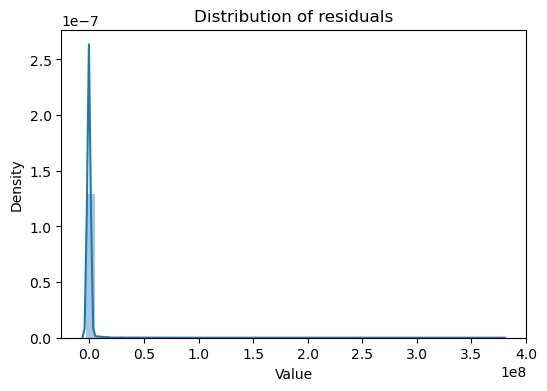

In [172]:
# Creating a Histogram of Residuals (y_test-y_pred_ridge)

plt.figure(figsize=(6,4))
sns.distplot(y_test - y_pred_ridge)
plt.title('Distribution of residuals')

In [174]:
from sklearn.tree import DecisionTreeRegressor

In [175]:
clf = DecisionTreeRegressor()

In [176]:
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [177]:
y_pred = clf.predict(x_test)

In [178]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [179]:
y_train_pred , y_test_pred

(array([1.08381000e+05, 1.77000000e+02, 8.03300000e+03, ...,
        1.02710000e+04, 4.55000000e+05, 2.34819955e+06]),
 array([4.590000e+02, 9.472900e+04, 1.700000e+01, ..., 8.989138e+05,
        8.053000e+03, 8.950000e+03]))

In [180]:
train_score = r2_score(y_train, y_train_pred)  # R² score for training
test_score = r2_score(y_test, y_test_pred) 

In [181]:
train_score , test_score 

(1.0, 0.9325227708316568)

In [182]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [183]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 4352690248452.9883
R-squared (R2): 0.9325227708316568


In [184]:
minDepth = 100

minRMSE = 100000

In [185]:
# Hyperparameter tuning for Decision Tree Regressor:

for depth in range(2, 15):
    dt_reg = DecisionTreeRegressor(max_depth = depth)
    dt_reg.fit(x_train,y_train)
    y_pred_dt_reg = dt_reg.predict(x_test)
    mse_dt = mean_squared_error(y_test,y_pred_dt_reg)
    rmse_dt = np.sqrt(mse_dt)
    print('Depth:', depth, ', MSE:', mse_dt, ', RMSE:', rmse_dt)
    
    if rmse_dt < minRMSE:
        minRMSE = rmse_dt
        minDepth = depth  
# Depth: 14 , MSE: 175, RMSE: 132 is the most optimal depth for the decision tree

Depth: 2 , MSE: 61588374252109.836 , RMSE: 7847826.084471408
Depth: 3 , MSE: 58111529289979.28 , RMSE: 7623091.845831275
Depth: 4 , MSE: 50531412301740.32 , RMSE: 7108545.020026272
Depth: 5 , MSE: 33858498416607.875 , RMSE: 5818805.583331332
Depth: 6 , MSE: 19279319302192.21 , RMSE: 4390822.166996998
Depth: 7 , MSE: 12657348260238.795 , RMSE: 3557716.7200662275
Depth: 8 , MSE: 6738606901679.91 , RMSE: 2595882.6825725213
Depth: 9 , MSE: 4536211947038.097 , RMSE: 2129838.4790960317
Depth: 10 , MSE: 7121213898441.831 , RMSE: 2668560.2669682824
Depth: 11 , MSE: 6388178694314.283 , RMSE: 2527484.6575823724
Depth: 12 , MSE: 6010194955972.0205 , RMSE: 2451569.896203659
Depth: 13 , MSE: 5585008345636.971 , RMSE: 2363262.2253226517
Depth: 14 , MSE: 4925241332598.839 , RMSE: 2219288.474398684


In [186]:
print('minDepth:',minDepth)
print('minRMSE:', minRMSE)

minDepth: 100
minRMSE: 100000


In [187]:
#Saving an instance with tuned parameters (in this case with mindepth=14)

dt_tuned = DecisionTreeRegressor(max_depth = minDepth)

In [188]:
dt_tuned.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=100)

In [189]:
dt_tuned_train_score = dt_tuned.score(x_train,y_train)

In [190]:
dt_tuned_test_score = dt_tuned.score(x_test,y_test)

In [191]:
dt_tuned_train_score ,dt_tuned_test_score

# Accuracy score is: 98%

(1.0, 0.9324984355388874)

In [192]:
y_train_pred = dt_tuned.predict(x_train)
y_test_pred = dt_tuned.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error on training data: {mse_train:.4f}")
print(f"Mean Squared Error on test data: {mse_test:.4f}")

print(f"R-squared score on training data: {r2_train:.4f}")
print(f"R-squared score on test data: {r2_test:.4f}")

Mean Squared Error on training data: 0.0000
Mean Squared Error on test data: 4354260022328.3477
R-squared score on training data: 1.0000
R-squared score on test data: 0.9325


In [193]:
from sklearn.ensemble import RandomForestRegressor

In [194]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [195]:
# Train the model
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [196]:
# Make predictions
y_pred = rf_model.predict(x_test)

In [197]:
rf_model_train_score = rf_model.score(x_train,y_train)

In [198]:
rf_model_test_score = rf_model.score(x_test,y_test)

In [199]:
rf_model_train_score , rf_model_test_score

(0.996967694711082, 0.9909813803161122)

In [200]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [201]:
print(f'Random Forest Mean Squared Error (MSE): {mse}')
print(f'Random Forest R-squared (R2): {r2}')

Random Forest Mean Squared Error (MSE): 581755629808.5404
Random Forest R-squared (R2): 0.9909813803161122


In [202]:
# Trying with RF hyperparameter tuning without cross validation

In [203]:
rf_reg_ht = RandomForestRegressor(n_estimators=50, random_state=91)

In [204]:
rf_reg_ht.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=91)

In [205]:
rf_reg_ht_train_score = rf_reg_ht.score(x_train,y_train)

In [206]:
rf_reg_ht_test_score = rf_reg_ht.score(x_test,y_test)

In [207]:
rf_reg_ht_train_score , rf_reg_ht_test_score

(0.9959815694128974, 0.9928057806900891)

In [208]:
# without cross validation not that much difference 

In [209]:
# Trying with RF hyperparameter tuning with cross validation

param_grid = {
'max_depth': [2,3,4,5],
 # 'min_samples_split': [2],
 # 'min_samples_leaf': [1, 2],
 # 'max_features': ['auto', 'sqrt'],
 #'criterion': ['absolute_error'],
 'n_estimators': [10,15]
}

In [210]:
# Create a GridSearchCV object with cross-validation

from sklearn.model_selection import GridSearchCV

grid_search_rf_reg_ht1 = GridSearchCV(rf_reg_ht, param_grid, cv=5, scoring='r2')

# Instead of neg_mean_squared_error, we can mention 'mean_squared_error' as 'scoring'

In [211]:
# Fit the model to the data

grid_search_rf_reg_ht1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=50, random_state=91),
             param_grid={'max_depth': [2, 3, 4, 5], 'n_estimators': [10, 15]},
             scoring='r2')

In [212]:
# Get the best parameters

print("Best parameters: ", grid_search_rf_reg_ht1.best_params_)

Best parameters:  {'max_depth': 5, 'n_estimators': 10}


In [213]:
# Get the best score from the tuned parameters

print("Best score: ", grid_search_rf_reg_ht1.best_score_)

Best score:  0.2651306854335109


In [214]:
grid_search_rf_reg_ht1_train_score = grid_search_rf_reg_ht1.score(x_train,y_train)

In [215]:
grid_search_rf_reg_ht1_train_score

0.2545798765413799

In [216]:
grid_search_rf_reg_ht1_test_score = grid_search_rf_reg_ht1.score(x_test,y_test)

In [217]:
grid_search_rf_reg_ht1_test_score

0.4879457698401275

In [218]:
# trying with another set of param grid to cross compare accuracy scores without overfiting 

In [219]:
# Trying with RF hyperparameter tuning with cross validation

param_grid1 = {
'max_depth': [2,3,6,7,9],
 # 'min_samples_split': [2],
 # 'min_samples_leaf': [1, 2],
 # 'max_features': ['auto', 'sqrt'],
 #'criterion': ['absolute_error'],
 'n_estimators': [4,5,6,7,9,10,12,13,15,17,19,20]
}

In [220]:
# Create a GridSearchCV object with cross-validation

from sklearn.model_selection import GridSearchCV

grid_search_rf_reg_ht2 = GridSearchCV(rf_reg_ht, param_grid1, cv=8, scoring='r2')

# Instead of neg_mean_squared_error, we can mention 'mean_squared_error' as 'scoring'

In [221]:
# Fit the model to the data

grid_search_rf_reg_ht2.fit(x_train, y_train)

GridSearchCV(cv=8,
             estimator=RandomForestRegressor(n_estimators=50, random_state=91),
             param_grid={'max_depth': [2, 3, 6, 7, 9],
                         'n_estimators': [4, 5, 6, 7, 9, 10, 12, 13, 15, 17, 19,
                                          20]},
             scoring='r2')

In [222]:
# Get the best parameters

print("Best parameters: ", grid_search_rf_reg_ht2.best_params_)

Best parameters:  {'max_depth': 9, 'n_estimators': 15}


In [223]:
# Get the best score from the tuned parameters

print("Best score: ", grid_search_rf_reg_ht2.best_score_)

Best score:  0.8739421406917041


In [224]:
grid_search_rf_reg_ht2_train_score = grid_search_rf_reg_ht2.score(x_train,y_train)

In [225]:
grid_search_rf_reg_ht2_test_score = grid_search_rf_reg_ht2.score(x_test,y_test)

In [226]:
grid_search_rf_reg_ht2_train_score , grid_search_rf_reg_ht2_test_score

(0.9008019213404475, 0.9118203699579106)

In [227]:
y_test_pred = grid_search_rf_reg_ht2.predict(x_test)

mse_test = mean_squared_error(y_test, y_test_pred)

dmae_test = mean_absolute_error(y_test, y_test_pred)

rmse_test = np.sqrt(mse_test)

print(f"Mean Squared Error on test data: {mse_test:.4f}")
print(f"Mean Absolute Error on test data: {dmae_test:.4f}")

print(f"Root Mean Squared Error on test data: {rmse_test:.4f}")

Mean Squared Error on test data: 5688120578259.6367
Mean Absolute Error on test data: 402558.8648
Root Mean Squared Error on test data: 2384978.1085


In [228]:
# gradient boosting

In [229]:
from sklearn.ensemble import GradientBoostingRegressor

In [230]:
# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [231]:
# Train the model
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [232]:
# Training score
gb_train_score = gb_model.score(x_train, y_train)
print(f"Training score: {gb_train_score:.4f}")

Training score: 0.2947


In [233]:
# Test score
gb_test_score = gb_model.score(x_test, y_test)
print(f"Test score: {gb_test_score:.4f}")

Test score: 0.3305


In [234]:
# Make predictions
y_pred = gb_model.predict(x_test)

In [235]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [236]:
print(f'Gradient Boosting Mean Squared Error (MSE): {mse}')
print(f'Gradient Boosting R-squared (R2): {r2}')

Gradient Boosting Mean Squared Error (MSE): 43189634216831.164
Gradient Boosting R-squared (R2): 0.3304561824076898


In [237]:
# Hyperparameter tuning on Gradient boosting

gradient_tuned_reg = GradientBoostingRegressor()

In [238]:
param_grid = {
    'n_estimators' : [5,7,9],
    'learning_rate' : [0.01, 0.1],
    'max_depth': [5,7,11],
    'loss': ['squared_error','absolute_error']
}

In [239]:
grid_search_tuned_gradient = GridSearchCV(estimator=gradient_tuned_reg, param_grid = param_grid, cv=5, scoring='r2')

In [240]:
grid_search_tuned_gradient.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 7, 11], 'n_estimators': [5, 7, 9]},
             scoring='r2')

In [241]:
grid_search_tuned_gradient.best_params_

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 11,
 'n_estimators': 9}

In [242]:
grid_search_tuned_gradient.best_score_

0.7917832979097627

In [243]:
y_pred_grid_search_tuned_gradient = grid_search_tuned_gradient.predict(x_test)

In [244]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_grid_search_tuned_gradient))

MSE:  12778053639426.713


In [245]:
r2 = r2_score(y_test, y_pred_grid_search_tuned_gradient)

In [246]:
r2

0.8019092550728995

In [247]:
gradient_tuned_reg_best_params = GradientBoostingRegressor(learning_rate= 0.1, loss='squared_error',max_depth=11, n_estimators=9)

In [248]:
gradient_tuned_reg_best_params.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=11, n_estimators=9)

In [249]:
train_score_gradient_reg_best_params = gradient_tuned_reg_best_params.score(x_train,y_train)

In [250]:
test_score_gradient_reg_best_params = gradient_tuned_reg_best_params.score(x_test,y_test)

In [251]:
train_score_gradient_reg_best_params, test_score_gradient_reg_best_params

(0.8297816543039029, 0.8019027218120286)

In [252]:
y_pred_gradient_reg_best_params = gradient_tuned_reg_best_params.predict(x_test)

In [253]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_gradient_reg_best_params))

MSE:  12778475074349.78


In [254]:
r2 = r2_score(y_test, y_pred_gradient_reg_best_params)

In [255]:
r2

0.8019027218120286

In [256]:
# Applying XG Boost Regressor

# Default parameters for XG Boost

# !pip install xgboost

# from sklearn.ensemble import xgBoost

from xgboost import XGBRegressor

In [257]:
xgb_reg = XGBRegressor()

In [258]:
xgb_reg.fit(x_train,y_train)

C:\Users\satti\anaconda3\Lib\site-packages\xgboost\data.py:440: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [259]:
train_score_xgb_reg = xgb_reg.score(x_train,y_train)

In [260]:
test_score_xgb_reg = xgb_reg.score(x_test,y_test)

In [261]:
train_score_xgb_reg, test_score_xgb_reg

(0.9774253062524015, 0.9563032712168243)

In [262]:
y_pred_xgb_reg = xgb_reg.predict(x_test)

In [263]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_xgb_reg))

MSE:  2818703844363.763


In [264]:
r2 = r2_score(y_test, y_pred_grid_search_tuned_gradient)

In [265]:
r2

0.8019092550728995

In [266]:
# Hyperparameter tuning for XG Boost

xgb_tuned_reg = XGBRegressor()

In [267]:
param_grid = {
    'n_estimators': [2,5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0, 1, 4],
    'reg_alpha': [0, 1, 4],
    'objective': ['reg:squarederror'], 
    'eval_metric': ['rmse'] 
}

In [268]:
from sklearn.model_selection import RandomizedSearchCV

In [269]:
xgb_tuned_reg = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
grid_search_tuned_xgb = RandomizedSearchCV(
    estimator=xgb_tuned_reg, 
    param_distributions=param_grid,  # Use RandomizedSearchCV for speed
    n_iter=3,
    cv=2, 
    scoring='r2',
    random_state=42
)

In [270]:
grid_search_tuned_xgb.fit(x_train, y_train, 
                          eval_set=[(x_train, y_train)], 
                          verbose=0)

C:\Users\satti\anaconda3\Lib\site-packages\xgboost\data.py:440: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\satti\anaconda3\Lib\site-packages\xgboost\data.py:440: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\satti\anaconda3\Lib\site-packages\xgboost\data.py:440: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\satti\anaconda3\Lib\site-packages\xgboost\data.py:440: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\satti\anaconda3\Lib\site-packages\xgboost\data.py:440: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\satti\

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric='rmse',
                                          feature_types=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rat...
                                          predictor=None, random_state=None, ...),
                   n_iter=3,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'eval_metric': ['rmse'],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [2, 5, 10],
                                        'objective': ['reg:squarederror'],
                                        'reg_alpha': [0, 1, 4],
                                        'reg_lambda': [0, 1, 4],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2')

In [271]:
from xgboost import XGBRegressor

param_dist = {
    'n_estimators': [5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [0, 1, 4],
    'reg_alpha': [0, 1, 4]}

Best parameters found:  {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 4, 'n_estimators': 20, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.5, 'colsample_bytree': 1.0}
Best R2 score:  0.28238624552515784


In [ ]:
xgb_tuned_reg = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

In [ ]:
random_search_tuned_xgb = RandomizedSearchCV(
    estimator=xgb_tuned_reg, 
    param_distributions=param_dist, 
    n_iter=3,
    cv=3, 
    scoring='r2', 
    random_state=42, 
    n_jobs=-1
)

In [ ]:
random_search_tuned_xgb.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train)], 
    verbose=0
)

In [ ]:
print("Best parameters found: ", random_search_tuned_xgb.best_params_)
print("Best R2 score: ", random_search_tuned_xgb.best_score_)

In [272]:
grid_search_tuned_xgb.best_params_

{'subsample': 0.8,
 'reg_lambda': 4,
 'reg_alpha': 1,
 'objective': 'reg:squarederror',
 'n_estimators': 10,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'eval_metric': 'rmse',
 'colsample_bytree': 1.0}

In [273]:
grid_search_tuned_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [274]:
grid_search_tuned_xgb.best_score_

0.2126314539127953

In [275]:
y_pred_grid_search_tuned_xgb = grid_search_tuned_xgb.predict(x_test)

In [276]:
# Training score
xgb_train_score = grid_search_tuned_xgb.score(x_train, y_train)
print(f"Training score: {xgb_train_score:.4f}")

Training score: 0.2357


In [277]:
# Test score
xgb_test_score = grid_search_tuned_xgb.score(x_test, y_test)
print(f"Test score: {xgb_test_score:.4f}")

Test score: 0.3693


In [278]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_grid_search_tuned_xgb))

MSE:  40682754219124.18


In [279]:
r2 = r2_score(y_test, y_pred_grid_search_tuned_xgb)

In [280]:
r2 

0.36931888718272654

In [281]:
xgb_tuned_reg_best_params = XGBRegressor(colsample_bytree=1.0,eval_metric='rmse',learning_rate=0.1,max_depth=7,min_child_weight=3,
                                      n_estimators=7,objective='reg:squarederror',reg_alpha=0,reg_lambda=1,subsample=0.8)

In [282]:
xgb_tuned_reg_best_params.fit(x_train,y_train)

C:\Users\satti\anaconda3\Lib\site-packages\xgboost\data.py:440: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=7, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [283]:
train_score_xgb_reg_best_params = xgb_tuned_reg_best_params.score(x_train,y_train)

In [284]:
test_score_xgb_reg_best_params = xgb_tuned_reg_best_params.score(x_test,y_test)

In [285]:
train_score_xgb_reg_best_params , test_score_xgb_reg_best_params

(0.5085790149472365, 0.5765982849560369)

In [286]:
y_pred_xgb_reg_best_params = xgb_tuned_reg_best_params.predict(x_test)

In [287]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_xgb_reg_best_params))

MSE:  27311976780379.383


In [288]:
r2 = r2_score(y_test, y_pred_xgb_reg_best_params)

In [289]:
r2

0.5765982849560369